# **Tier-1 Hexagonal Cell**

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

keras = tf.keras

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [2]:

X = np.random.normal(0,4, 9)  #shape of path loss matrix   #sigma in dB
#print(X)

fixed_shad = [-0.28322395, 1.21221711, 0.14622614, -0.83883009, -0.13781312, 1.34763206, 0.6653947, 0.06966137, -0.19037237]
print(fixed_shad)

[-0.28322395, 1.21221711, 0.14622614, -0.83883009, -0.13781312, 1.34763206, 0.6653947, 0.06966137, -0.19037237]


In [4]:
radius = 500

t = np.linspace(0, 2*math.pi, 7)

#center cell
x1 = []
y1 = []
for i in range(len(t)):
  x1.append(0 + radius*math.cos(t[i]))
  y1.append(0 + radius*math.sin(t[i]))

c_x1 = 0  #BS Location Center Cell x-axis
c_y1 = 0 #BS Location Center Cell y-axis


#upper cell
x2 = []
y2 = []
for i in range(len(t)):
  x2.append(0+radius*math.cos(t[i]))
  y2.append(((math.sqrt(3)/2)*2*radius) + (radius*math.sin(t[i])))

c_x2 = 0  #BS Location Upper Cell x-axis
c_y2 = ((math.sqrt(3)/2)*2*radius) #BS Location Upper Cell y-axis


#lower cell
x3 = []
y3 = []
for i in range(len(t)):
  x3.append(0+radius*math.cos(t[i]))
  y3.append(-((math.sqrt(3)/2)*2*radius) + (radius*math.sin(t[i])))

c_x3 = 0  #BS Location Lower Cell x-axis
c_y3 = -((math.sqrt(3)/2)*2*radius) #BS Location Lower Cell y-axis


#right upper cell
x4 = []
y4 = []
for i in range(len(t)):
  x4.append((radius+(radius/2)) + radius*math.cos(t[i]))
  y4.append(((math.sqrt(3)/2)*radius) + (radius*math.sin(t[i])))

c_x4 = (radius+(radius/2))  #BS Location right upper Cell x-axis
c_y4 = ((math.sqrt(3)/2)*radius) #BS Location right upper Cell y-axis


#%Right Lower cell
x5 = []
y5 = []
for i in range(len(t)):
  x5.append((radius+(radius/2)) + radius*math.cos(t[i]))
  y5.append(-((math.sqrt(3)/2)*radius) + (radius*math.sin(t[i])))

c_x5 = (radius+(radius/2))  #BS Location right lower Cell x-axis
c_y5 = -((math.sqrt(3)/2)*radius) #BS Location right lower Cell y-axis


#%Left Upper cell
x6 = []
y6 = []
for i in range(len(t)):
  x6.append(-(radius+(radius/2)) + radius*math.cos(t[i]))
  y6.append(((math.sqrt(3)/2)*radius) + (radius*math.sin(t[i])))

c_x6 = -(radius+(radius/2))  #BS Location Left upper x-axis
c_y6 = ((math.sqrt(3)/2)*radius) #BS Location Left upper y-axis


#left lower cell
x7 = []
y7 = []
for i in range(len(t)):
  x7.append(-(radius+(radius/2)) + radius*math.cos(t[i]))
  y7.append(-((math.sqrt(3)/2)*radius) + (radius*math.sin(t[i])))

c_x7 = -(radius+(radius/2)) #BS Location left lower Cell x-axis
c_y7 = -((math.sqrt(3)/2)*radius) #BS Location left lower Cell y-axis


BS_locations_x = [c_x1, c_x2, c_x3, c_x4, c_x5, c_x6, c_x7]    #centre, up, low, right up, right low, left up, left low
BS_locations_y = [c_y1, c_y2, c_y3, c_y4, c_y5, c_y6, c_y7]

X =np.array([x1,x2,x3,x4,x5,x6,x7])
Y =np.array([y1,y2,y3,y4,y5,y6,y7])

diff = [c_x4, c_y4] 
ISD = np.linalg.norm(diff)
print("ISD: ", ISD)

ISD:  866.0254037844386


[-1500, -1500, -1500, -750.0, -750.0, -2250.0, -2250.0]
[1732.0508075688772, 2598.0762113533156, 866.0254037844386, 2165.0635094610966, 1299.0381056766578, 2165.0635094610966, 1299.0381056766578]


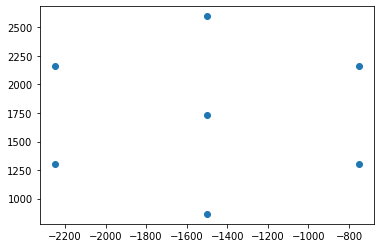

In [5]:
# ISD = sqrt(3)*RADIUS
isd = math.sqrt(3)*radius
BS2x = [x + (-3*radius) for x in BS_locations_x]
BS2y = [y + (2*isd) for y in BS_locations_y]

print(BS2x)
print(BS2y)
plt.scatter(BS2x, BS2y)
plt.show()

In [6]:
BS3x = [x + (1.5*radius) for x in BS_locations_x]
BS3y = [y + (2.5*isd) for y in BS_locations_y]

In [7]:
BS4x = [x + (4.5*radius) for x in BS_locations_x]
BS4y = [y + (0.5*isd) for y in BS_locations_y]

In [8]:
BS5x = [x + (3*radius) for x in BS_locations_x]
BS5y = [y + (-2*isd) for y in BS_locations_y]

In [9]:
BS6x = [x + (-1.5*radius) for x in BS_locations_x]
BS6y = [y + (-2.5*isd) for y in BS_locations_y]

In [10]:
BS7x = [x + (-4.5*radius) for x in BS_locations_x]
BS7y = [y + (-0.5*isd) for y in BS_locations_y]

In [11]:
BS_total_x = [BS_locations_x, BS2x, BS3x, BS4x, BS5x, BS6x, BS7x]
#print(BS_total_x)
BS_wrap_around_x = sum(BS_total_x, [])
print(BS_wrap_around_x)
print(np.shape(BS_wrap_around_x))

BS_total_y = [BS_locations_y, BS2y, BS3y, BS4y, BS5y, BS6y, BS7y]
BS_wrap_around_y = sum(BS_total_y, [])

[0, 0, 0, 750.0, 750.0, -750.0, -750.0, -1500, -1500, -1500, -750.0, -750.0, -2250.0, -2250.0, 750.0, 750.0, 750.0, 1500.0, 1500.0, 0.0, 0.0, 2250.0, 2250.0, 2250.0, 3000.0, 3000.0, 1500.0, 1500.0, 1500, 1500, 1500, 2250.0, 2250.0, 750.0, 750.0, -750.0, -750.0, -750.0, 0.0, 0.0, -1500.0, -1500.0, -2250.0, -2250.0, -2250.0, -1500.0, -1500.0, -3000.0, -3000.0]
(49,)


**x co-ordinates of Base Stations(all wrap around + sectors)**


In [12]:
BS_wrap_around_total3x = []
for i in BS_wrap_around_x:
  for j in range(3):
    BS_wrap_around_total3x.append(i)

print(BS_wrap_around_total3x,"\n", len(BS_wrap_around_total3x))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 750.0, 750.0, 750.0, 750.0, 750.0, 750.0, -750.0, -750.0, -750.0, -750.0, -750.0, -750.0, -1500, -1500, -1500, -1500, -1500, -1500, -1500, -1500, -1500, -750.0, -750.0, -750.0, -750.0, -750.0, -750.0, -2250.0, -2250.0, -2250.0, -2250.0, -2250.0, -2250.0, 750.0, 750.0, 750.0, 750.0, 750.0, 750.0, 750.0, 750.0, 750.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2250.0, 2250.0, 2250.0, 2250.0, 2250.0, 2250.0, 2250.0, 2250.0, 2250.0, 3000.0, 3000.0, 3000.0, 3000.0, 3000.0, 3000.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 2250.0, 2250.0, 2250.0, 2250.0, 2250.0, 2250.0, 750.0, 750.0, 750.0, 750.0, 750.0, 750.0, -750.0, -750.0, -750.0, -750.0, -750.0, -750.0, -750.0, -750.0, -750.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1500.0, -1500.0, -1500.0, -1500.0, -1500.0, -1500.0, -2250.0, -2250.0, -2250.0, -2250.0, -2250.0, -2250.0, -2250.0, -2250.0, -2250.0, -1500.0, -1500.0, -1500.0, 

**y co-ordinates of Base Stations(all wrap around+sectors)**




In [13]:
BS_wrap_around_total3y = []
for i in BS_wrap_around_y:
  for j in range(3):
    BS_wrap_around_total3y.append(i)

print(BS_wrap_around_total3y,"\n", len(BS_wrap_around_total3y))

[0, 0, 0, 866.0254037844386, 866.0254037844386, 866.0254037844386, -866.0254037844386, -866.0254037844386, -866.0254037844386, 433.0127018922193, 433.0127018922193, 433.0127018922193, -433.0127018922193, -433.0127018922193, -433.0127018922193, 433.0127018922193, 433.0127018922193, 433.0127018922193, -433.0127018922193, -433.0127018922193, -433.0127018922193, 1732.0508075688772, 1732.0508075688772, 1732.0508075688772, 2598.0762113533156, 2598.0762113533156, 2598.0762113533156, 866.0254037844386, 866.0254037844386, 866.0254037844386, 2165.0635094610966, 2165.0635094610966, 2165.0635094610966, 1299.0381056766578, 1299.0381056766578, 1299.0381056766578, 2165.0635094610966, 2165.0635094610966, 2165.0635094610966, 1299.0381056766578, 1299.0381056766578, 1299.0381056766578, 2165.0635094610966, 2165.0635094610966, 2165.0635094610966, 3031.088913245535, 3031.088913245535, 3031.088913245535, 1299.038105676658, 1299.038105676658, 1299.038105676658, 2598.076211353316, 2598.076211353316, 2598.07621

In [14]:
BS_cor_x = np.array(BS_wrap_around_total3x)
print(BS_cor_x.shape)

BS_cor_y = np.array(BS_wrap_around_total3y)
print(BS_cor_y.shape)

(147,)
(147,)


# Function to generate(nums) amount of users in each sector

In [15]:
def GetSecusers(nums):
  
  xy_all = np.zeros((3*nums, 2))
  for j in range(7):
    count = 0
    m = 0
    p2 = np.zeros((nums,2)) 
    hk = np.array([BS_locations_x[j],BS_locations_y[j]])

    while(count<3):
      a = np.array([X[j, 0+m] - BS_locations_x[j], Y[j, 0+m] - BS_locations_y[j]])
      b = np.array([X[j, 2+m] - BS_locations_x[j], Y[j, 2+m] - BS_locations_y[j]])
      p = []
      for i in range(nums):
        u1 = np.random.uniform(0,1)                
        u2 = np.random.uniform(0,1)  
        p.append(u1*a + u2*b)
      p = np.array(p+hk)
      angle_cord= p - hk
      angles = np.arctan2(angle_cord[:,1], angle_cord[:,0])  #np.arctan2(y, x)


      if(count==0):
        p2 = p
        angles2 = angles
      else:
        p2 = np.concatenate((p2, p),axis=0)
        angles2 = np.concatenate((angles2, angles),axis=0)
      m+=2
      count+=1

    #CLUB ALL Base station users
    if(j==0):
      xy_all = p2
      angles_all = angles2
    else:
      xy_all = np.concatenate((xy_all, p2), axis=0)
      angles_all = np.concatenate((angles_all, angles2),axis=0)  

  n_users, nu = np.shape(xy_all)
  #print(np.shape(xy_all))
  #print(n_users)

  return n_users, xy_all[:,0], xy_all[:,1]
    

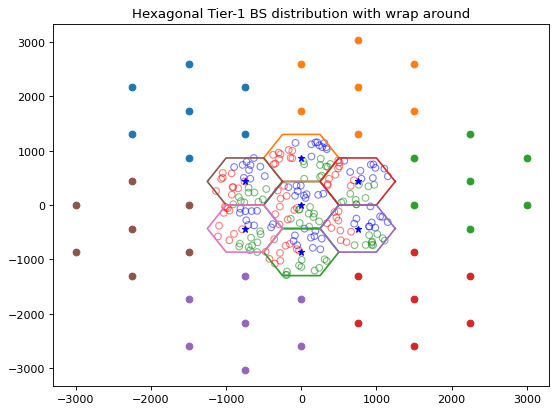

In [16]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)


numm = 10
total_user, xs, ys= GetSecusers(numm)
plt.plot(x1,y1)
plt.plot(x2,y2)                                                                 
plt.plot(x3,y3)
plt.plot(x4,y4)
plt.plot(x5,y5)
plt.plot(x6,y6)
plt.plot(x7,y7)
plt.plot(BS_locations_x,BS_locations_y,'b*')    

plt.scatter(BS2x, BS2y)
plt.scatter(BS3x, BS3y)
plt.scatter(BS4x, BS4y)
plt.scatter(BS5x, BS5y)
plt.scatter(BS6x, BS6y)
plt.scatter(BS7x, BS7y)

plt.title('Hexagonal Tier-1 BS distribution with wrap around')
                                                                                
for i in range(7):
  k =(3*numm)*i
  plt.scatter(xs[k:k+numm], ys[k:k+numm], edgecolor='b', facecolor='none', alpha=0.5)
  plt.scatter(xs[k+numm:k+2*numm], ys[k+numm:k+2*numm], edgecolor='r', facecolor='none', alpha=0.5)
  plt.scatter(xs[k+2*numm:k+3*numm], ys[k+2*numm:k+3*numm], edgecolor='g', facecolor='none', alpha=0.5)


plt.show()

In [17]:
def PlotSecUsers(n_users, xs, ys):
  
  plt.plot(x1,y1)   #x,x2,x3,...,x7 are hex cell boundary         
  plt.plot(x2,y2)              
  plt.plot(x3,y3)
  plt.plot(x4,y4)
  plt.plot(x5,y5)
  plt.plot(x6,y6)
  plt.plot(x7,y7)
  plt.plot(BS_locations_x,BS_locations_y,'r*')
  plt.title('Hexagonal Tier-1 BS distribution')
  plt.xlabel('x')
  plt.ylabel('y')

  numm = int (n_users/21)

  for i in range(7):
    k =(3*numm)*i
    plt.scatter(xs[k:k+numm], ys[k:k+numm], edgecolor='b', facecolor='none', alpha=0.5)
    plt.scatter(xs[k+numm:k+2*numm], ys[k+numm:k+2*numm], edgecolor='r', facecolor='none', alpha=0.5)
    plt.scatter(xs[k+2*numm:k+3*numm], ys[k+2*numm:k+3*numm], edgecolor='g', facecolor='none', alpha=0.5)



## **Mobility of users**

In [18]:
#Random Waypoint Model

def User_Mobility(total_user, xs, ys, v_min, v_max, Time_instants):

  # range of x and y coordinates for user mobility
  x_min = -2.25*radius
  x_max = 2.25*radius

  y_min = -1.5*isd
  y_max = 1.5*isd


  # position matrices
  x_pos = np.zeros((total_user, Time_instants))
  y_pos = np.zeros((total_user, Time_instants))

  

  # Choose velocity uniformly between v_min and v_max
  velocity = np.random.randint(v_min, v_max, (total_user))#, Time_instants)) #m/sec  #total_users x Time_instants
  #print(np.shape(velocity))

  for i in range(total_user):

    x_previous = xs[i]
    y_previous = ys[i]



    # User starts from initial position to a final position
    x_pos[i,0] = xs[i]
    y_pos[i,0] = ys[i]


    for t in range(1,Time_instants):

      #directions of the mobile users
      theta = np.random.randint(0,360)

      x_pos[i,t] = x_previous + velocity[i]* math.cos(math.radians(theta))

      if x_pos[i,t]>x_max or x_pos[i,t]<x_min:
        theta = 180 - theta
        x_pos[i,t] = x_previous + velocity[i]* math.cos(math.radians(theta))

      y_pos[i,t] = y_previous + velocity[i]* math.sin(math.radians(theta))

      if y_pos[i,t]>y_max or y_pos[i,t]<y_min:
        theta = 180 - theta
        y_pos[i,t] = y_previous + velocity[i]* math.sin(math.radians(theta))

      # Now the current position of the users becomes the previous position for next time instant
      x_previous = x_pos[i,t]
      y_previous = y_pos[i,t]

    
  x_mobile = np.transpose(x_pos) #time_instants x total_users
  y_mobile = np.transpose(y_pos)

  velocity_users = np.transpose(velocity)
  
  return x_mobile, y_mobile, velocity_users


(105,)


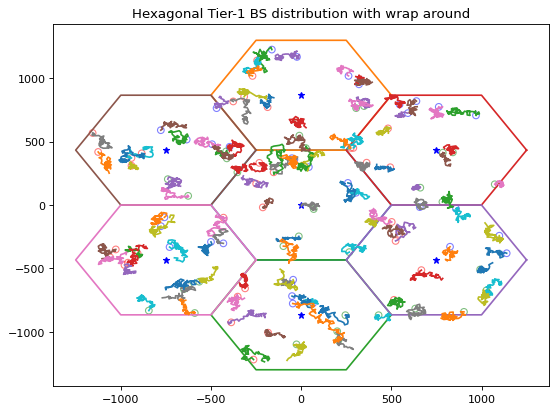

In [19]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)


numm = 5
total_user, xs, ys= GetSecusers(numm)

XX, YY, vel_user = User_Mobility(total_user, xs, ys, 10, 20, 50)
print(np.shape(vel_user))

plt.plot(x1,y1)
plt.plot(x2,y2)                                                                 
plt.plot(x3,y3)
plt.plot(x4,y4)
plt.plot(x5,y5)
plt.plot(x6,y6)
plt.plot(x7,y7)
plt.plot(BS_locations_x,BS_locations_y,'b*')    

#plt.scatter(BS2x, BS2y)
#plt.scatter(BS3x, BS3y)
#plt.scatter(BS4x, BS4y)
#plt.scatter(BS5x, BS5y)
#plt.scatter(BS6x, BS6y)
#plt.scatter(BS7x, BS7y)

plt.title('Hexagonal Tier-1 BS distribution with wrap around')
                                                                                
for i in range(7):
  k =(3*numm)*i
  plt.scatter(xs[k:k+numm], ys[k:k+numm], edgecolor='b', facecolor='none', alpha=0.5)
  plt.scatter(xs[k+numm:k+2*numm], ys[k+numm:k+2*numm], edgecolor='r', facecolor='none', alpha=0.5)
  plt.scatter(xs[k+2*numm:k+3*numm], ys[k+2*numm:k+3*numm], edgecolor='g', facecolor='none', alpha=0.5)


for i in range(total_user):
  plt.plot(XX[:,i], YY[:,i])

plt.show()

In [20]:
print(XX[0][0], YY[0][0])
print(XX[1][0], YY[1][0])
#plt.plot(XX[0:2][0],YY[0:2][0])


-51.283156756431765 369.09929812510194
-32.329439801495106 370.4246711262403


In [21]:
print(np.shape(XX)) #users, time_instants

(50, 105)


# **Path Loss RMA Scenario**

In [22]:
#PL model for RMA scenario

def PathlossRMA(d_2d, d_3d):
  f_c = 2.3 #GHz
  c = 3*pow(10,8) #m/s

  h_ut = 1.5 #m
  h_bs = 35 #m
  h = 5 #m --avg. building height
  W = 20 #m --avg. street width

  d_bp = 2*math.pi*h_bs*h_ut*f_c*pow(10,9)/c

  #LOS probability
  if d_2d <= 10:
    P_los = 1
  else:
    P_los = math.exp(-1*(d_2d-10)/1000)
    
  PL_1 = 20*math.log(40*math.pi*d_3d*f_c/3 , 10) + min(0.03*pow(h, 1.72) , 10)*math.log(d_3d, 10) - min(0.044*pow(h, 1.72) , 14.77) + 0.002*math.log10(h)*d_3d
  PL_2 = PL_1*d_bp + 40*math.log10(d_3d/d_bp)

  #NLOS
  #PL_NLOS = 161.04 - 7.1*math.log10(W) +7.5*math.log10(h) - (24.37-3.7*pow(h/h_bs, 2))*math.log10(h_bs) + (43.42-3.1*math.log10(h_bs))*(math.log10(d_3d)-3) + 20*math.log10(f_c) - (3.2*pow(math.log10(11.75*h_ut) , 2) - 4.97)
  PL_NLOS = 0

  #LOS for prob>0.5
  if P_los >= 0.5:
    if d_2d <= d_bp:
      return PL_1
    elif d_2d > d_bp and d_2d < 10*1000:
      return PL_2

  else: #NLOS for prob<0.5
    if d_2d <= d_bp:
      return max(PL_1, PL_NLOS)
    elif d_2d > d_bp and d_2d < 5000:
      return max(PL_2, PL_NLOS)



# **Path Loss UMA Scenario**

In [23]:
f_c = 2.3 #GHz
c = 3*pow(10,8) #m/s

In [24]:
#PL model for UMA scenario

def PathlossUMA(d_2d, d_3d):
  f_c = 2.3 #GHz
  c = 3*pow(10,8) #m/s
  h_ut = 1.5 #m
  h_bs = 25 #m
  h_e = 1
  h_bs_eff = h_bs - h_e
  h_ut_eff = h_ut - h_e

  d_bp_eff = 4*h_bs_eff*h_ut_eff*f_c*pow(10,9)/c

  #LOS probability
  #for outdoor users
  if d_2d <= 18:
    P_los = 1
  else:
    if h_ut <= 13:
      C_h = 0
    else:
      C_h = pow((h_ut - 13)/10, 1.5)
    
    temp1 = (math.exp(-1*d_2d/63))*(1 - 18/d_2d)
    #temp2 = 1 + C_h*(5/4)*pow(d_2d/100, 3)*math.exp(-d_2d/150)
    temp2 = 1
    P_los = (18/d_2d + temp1)*temp2
    #print(P_los)

  #print(P_los)
  PL_1 = 28 + 22*math.log(d_3d, 10) + 20*math.log(f_c, 10)
  PL_2 = 28 + 40*math.log(d_3d, 10) + 20*math.log(f_c, 10) - 9*math.log(pow(d_bp_eff, 2) + pow(h_bs - h_ut, 2) , 10)
  #PL_NLOS = 13.54 + 39.08*math.log(d_3d, 10) + 20*math.log(f_c, 10) - 0.6*(h_ut - 1.5)
  PL_NLOS = 0

  #LOS for prob>0.5
  if P_los >= 0.5:
    if d_2d <= d_bp_eff:
      return PL_1
    elif d_2d > d_bp_eff and d_2d < 5000:
      return PL_2

  else: #NLOS for prob<0.5
    if d_2d <= d_bp_eff:
      return max(PL_1, PL_NLOS)
    elif d_2d > d_bp_eff and d_2d < 5000:
      return max(PL_2, PL_NLOS)

# Distance Calculations

In [25]:
def getdist(n_users,x,y, time_instants):
  h_bs = 25 #m
  h_ut = 1.5 #m
  h = 5 #avg building height
  h_act = h_bs - h_ut #m

  #distance from each user to base station
  Dr_2d = np.zeros((time_instants, 7*7*3, n_users))

  for t in range(time_instants):
    for i in range(7*7*3):
      for j in range(n_users):
        Dr_2d[t][i][j] = math.sqrt(pow(BS_wrap_around_total3x[i] - x[t][j], 2) + pow(BS_wrap_around_total3y[i] - y[t][j], 2)) 

  Dr_3d = np.zeros((time_instants, 7*7*3, n_users))

  for t in range(time_instants):
    for i in range(7*7*3):
      for j in range(n_users):
        Dr_3d[t][i][j] = math.sqrt(pow(Dr_2d[t][i][j], 2) + pow(h_act, 2))

  return Dr_2d, Dr_3d

# Path Loss Matrix

In [26]:
def PathLoss(dist2d, dist3d, n_users):
  Dr_2d, Dr_3d = dist2d, dist3d
  
  PLr = np.zeros(np.shape(Dr_2d))

  time_instants, row, col = np.shape(Dr_2d)

  #path loss calculation
  for t in range(time_instants):
    for i in range(7*7*3):
      for j in range(n_users):
        #PLr[t][i][j] = PathlossRMA(Dr_2d[t][i][j], Dr_3d[t][i][j])   #for RMA
        PLr[t][i][j] = PathlossUMA(Dr_2d[t][i][j], Dr_3d[t][i][j])   #for UMA
  
  return PLr


In [27]:
a = np.zeros((2,2))
b = np.ones((2,2))
print(b)
b[0] = a[1]
print(b)

[[1. 1.]
 [1. 1.]]
[[0. 0.]
 [1. 1.]]


In [28]:
def PathLossWrapped(pathloss1):
  time_instant, basest, numusers = np.shape(pathloss1)

  pathloss_wrap = np.zeros((time_instant, basest*3, numusers))

  for t in range(time_instant):
    for i in range(basest):
      if(i==0):
        j = i
      pathloss_wrap[t][j] = np.copy(pathloss1[t][i])
      pathloss_wrap[t][j+1] = np.copy(pathloss1[t][i])
      pathloss_wrap[t][j+2] = np.copy(pathloss1[t][i])
      j = i+3

  return pathloss_wrap

# Log Normal Shadowing

In [29]:
#X = np.random.lognormal(mean = 0,sigma= 1, size= np.shape(PLr) )  #shape of path loss matrix   #sigma = 1dB

#log_norm_loss = 10*X  #dB
#print(log_norm_loss)

#plt.plot(np.log10(Dr_2d[0]), log_norm_loss[0], 'r+')
#plt.show() 

In [30]:
def LogNormShadow(PLr): 
  X = np.random.normal(0,4, np.shape(PLr))  #shape of path loss matrix   #sigma in dB
  log_norm_loss = 1*X  #dB 

  #print(log_norm_loss)
  
  return log_norm_loss

In [31]:
p = np.zeros(1)

lgloss = LogNormShadow(p) 
print(lgloss) 

[-2.18204057]


# Fixed Shadowing

In [32]:
def getshadloss(x_mobile, y_mobile): #time_instants x users
    
    X = np.random.normal(0,4, 9)  #dB

    shad_loss = np.zeros(np.shape(x_mobile))
    #fixed_shad = [-0.28322395, 1.21221711, 0.14622614, -0.83883009, -0.13781312, 1.34763206, 0.6653947, 0.06966137, -0.19037237]
    fixed_shad = np.copy(X)
    R = radius
    ISD = math.sqrt(3)*radius
    
    rows, cols = np.shape(x_mobile)
    
    for i in range(rows):
        for j in range(cols):
            x = x_mobile[i][j]
            y = y_mobile[i][j]
            
            if(x>= -3*R and x<= -R and y>= ISD and y<= 3*ISD):
                shad_loss[i][j] = fixed_shad[0]
                
            elif(x>= -R and x<= R and y>= ISD and y<= 3*ISD):
                shad_loss[i][j] = fixed_shad[1]
                
            elif(x>= R and x<= 3*R and y>= ISD and y<= 3*ISD):
                shad_loss[i][j] = fixed_shad[2]
                
            elif(x>= -3*R and x<= -R and y>= -ISD and y<= ISD):
                shad_loss[i][j] = fixed_shad[3]
                
            elif(x>= -R and x<= R and y>= -ISD and y<= ISD):
                shad_loss[i][j] = fixed_shad[4]
                
            elif(x>= R and x<= 3*R and y>= -ISD and y<= ISD):
                shad_loss[i][j] = fixed_shad[5]
                
            elif(x>= -3*R and x<= -R and y>= -3*ISD and y<= -ISD):
                shad_loss[i][j] = fixed_shad[6]
                
            elif(x>= -R and x<= R and y>= -3*ISD and y<= -ISD):
                shad_loss[i][j] = fixed_shad[7]
                
            elif(x>= R and x<= 3*R and y>= -3*ISD and y<= -ISD):
                shad_loss[i][j] = fixed_shad[8]
                
            else:
                shad_loss[i][j] = 0
            
        
    return shad_loss
    

# Correlated Shadowing

In [33]:
BS_cords = np.concatenate((BS_total_x, BS_total_y), axis=0)
BS_cords = BS_cords.reshape(2, -1) 

print(BS_cords.shape)
#print(BS_cords)

(2, 49)


In [34]:
def correlated_shadowing(x_mobile, y_mobile, sigma_shd):
    bs_wrap = 49
    D_cor = 100
    #sigma_shd = 100 #dB
    
    Dist_bs = np.zeros((bs_wrap, bs_wrap))
    Corr_bs = np.zeros(np.shape(Dist_bs))
    
    time_steps, num_users = np.shape(x_mobile)
    
    #shadowing matrix dim -> time_steps x base_stations x total_users
    shadowing_mat = np.zeros((time_steps, 147, num_users))

    for m1 in range(bs_wrap):
        for m2 in range(bs_wrap):
            Dist_bs[m1][m2] = np.linalg.norm(BS_cords[:, m1] - BS_cords[:, m2])
            Corr_bs[m1][m2] = np.exp(-np.log(2)*Dist_bs[m1][m2]/D_cor)

    A1 = np.linalg.cholesky(Corr_bs)
    #print(A1)
    
    bsrandom1 = np.random.normal(size = bs_wrap)

    sh_BS = np.matmul(A1, bsrandom1)
    #print(sh_BS) #dim -> total_base_stations

    for m in range(bs_wrap):
        sh_BS[m] = (1/math.sqrt(2))*sigma_shd*sh_BS[m]/np.linalg.norm(A1[m,:])

    #print(sh_BS)

    # for users
    for time in range(time_steps):
        
        time_steps, num_users = np.shape(x_mobile)
        Dist_user = np.zeros((num_users, num_users))
        Corr_user = np.zeros((num_users, num_users))

        for m1 in range(num_users):
            for m2 in range(num_users):
                Dist_user[m1][m2] = np.linalg.norm([x_mobile[time][m1]-x_mobile[time][m2], y_mobile[time][m1]-y_mobile[time][m2]])
                Corr_user[m1][m2] = np.exp(-np.log(2)*Dist_user[m1][m2]/D_cor)

        A2 = np.linalg.cholesky(Corr_user)
        userrandom1 = np.random.normal(size = num_users)
        
        sh_user = np.matmul(A2, userrandom1) #dim -> num_users

        for m in range(num_users):
            sh_user[m] = (1/math.sqrt(2))*sigma_shd*sh_user[m]/np.linalg.norm(A2[m])
        
        #Shadowing Matrix for each time step:
        
        for bs in range(147):
            for user in range(num_users):
                shadowing_mat[time][bs][user] = sh_BS[bs//3] + sh_user[user]
            
    
    #print(shadowing_mat)

    return shadowing_mat

In [35]:
#plt.plot(x_mob[:,0], y_mob[:,0], '*')
#shad_loss = correlated_shadowing(x_mob, y_mob)

In [36]:
#print(shad_loss[:50, 0, 1])

In [37]:
 '''plt.figure(figsize=(20, 6))
shuser1 = shad_loss[:1000, 0, 0]
print(shad_loss.shape)
print(shuser1.shape)
plt.plot(shuser1)
plt.show() '''

'plt.figure(figsize=(20, 6))\nshuser1 = shad_loss[:1000, 0, 0]\nprint(shad_loss.shape)\nprint(shuser1.shape)\nplt.plot(shuser1)\nplt.show() '

# Directivity Gain and Antenna Gain

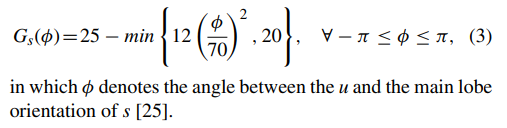

In [38]:
#angle made by user wrt each base station
def UserAngle(mobileuser_x, mobileuser_y, BS_totalx, BS_totaly):
  
  t, user_num = np.shape(mobileuser_x) #time_instant, total_users

  total_bss = len(BS_totalx)

  all_angles = np.zeros((t, total_bss, user_num))
  dx = np.zeros((t, total_bss, user_num))
  dy = np.zeros((t, total_bss, user_num)) 

  for time in range(t):
    for bs in range(total_bss):
      dx[time][bs] = mobileuser_x[time] - BS_totalx[bs]

  for time in range(t):
    for bs in range(total_bss):
      dy[time][bs] = mobileuser_y[time] - BS_totaly[bs]

  
  all_angles = np.arctan2(dy, dx)  #time_instant x base_station x total_users

  return all_angles

In [39]:
kek = kekx = keky = np.random.randint(6, size = (5,3,4))
print(kek)
print(kek[0][1]-3)
print(kek[0])

[[[3 5 4 4]
  [2 5 5 5]
  [2 4 2 1]]

 [[5 0 0 5]
  [5 0 1 1]
  [1 2 4 4]]

 [[4 1 0 3]
  [0 3 0 3]
  [2 5 5 4]]

 [[1 4 5 1]
  [3 4 3 2]
  [0 0 0 4]]

 [[4 4 1 2]
  [3 1 3 3]
  [3 2 3 1]]]
[-1  2  2  2]
[[3 5 4 4]
 [2 5 5 5]
 [2 4 2 1]]


In [40]:
test1 = np.zeros((3,2)) - np.array([[1,1,1]]).transpose()
print(test1)

[[-1. -1.]
 [-1. -1.]
 [-1. -1.]]


In [41]:
#phi calculation
def FindPhi(user_angles):
  user_angles = user_angles*180/math.pi   #radians to degree
  
  t, bs, users = np.shape(user_angles)

  phi = np.zeros((t, bs, users)) #bs = (7*3)*7 = 147 = 49*3

  lobe_angle = np.array([[60,180,-60]*int(bs/3)])
  lobe_angle = lobe_angle.transpose()

  for time in range(t):
    phi[time] = lobe_angle - user_angles[time]


  #phi = lobe_angle - user_angles

  phi = np.where(phi>180, 360-phi, phi)  #convert phi range in -180 to 180 deg i.e., phi = phi>180 ? 360-phi : phi

  return phi*math.pi/180    # degree back to radians


In [42]:
lobe_angle = np.array([[60,180,-60]*49])
print(lobe_angle)
lobe_angle = lobe_angle.transpose()
print(len(lobe_angle))

[[ 60 180 -60  60 180 -60  60 180 -60  60 180 -60  60 180 -60  60 180 -60
   60 180 -60  60 180 -60  60 180 -60  60 180 -60  60 180 -60  60 180 -60
   60 180 -60  60 180 -60  60 180 -60  60 180 -60  60 180 -60  60 180 -60
   60 180 -60  60 180 -60  60 180 -60  60 180 -60  60 180 -60  60 180 -60
   60 180 -60  60 180 -60  60 180 -60  60 180 -60  60 180 -60  60 180 -60
   60 180 -60  60 180 -60  60 180 -60  60 180 -60  60 180 -60  60 180 -60
   60 180 -60  60 180 -60  60 180 -60  60 180 -60  60 180 -60  60 180 -60
   60 180 -60  60 180 -60  60 180 -60  60 180 -60  60 180 -60  60 180 -60
   60 180 -60]]
147


In [43]:
def DirectivityGain(users_phi):
  users_phi = users_phi * 180/math.pi #converts to degree
  dir_gain = 25 - np.minimum(12*np.power(users_phi/70, 2), 20)

  return dir_gain

In [44]:
'''n,x,y = GetSecusers(10) 
angles = UserAngle(xs,ys,BS_locations_3x, BS_locations_3y)

an1 = angles[6][0]
print(an1*180/math.pi)
print(angles*180/math.pi, '\n')


phis = FindPhi(angles)
ph1  = phis[7][0]
print(ph1*180/math.pi)
print(phis*180/math.pi, '\n')

dr_gain = DirectivityGain(phis)
print(dr_gain[:,0])'''
true=1

In [45]:
def AntennaGain(dir_gain):  #ant_gain = k*Direc_gain -> dir_gain(dB) = 10log10(k) + Direc_gain(dB)
  k = 0.5                   #k = antenna efficiency factor
  antenna_gain = 10*math.log10(k) + dir_gain 
  
  return antenna_gain

# **Channel Gain Calculations**

In [46]:
def ChannelGainCalculation2(pathloss, shadloss, userangles): #Channel Gain Calculations
    
    users_phi = FindPhi(userangles)
    directivity_gain = DirectivityGain(users_phi)

    rchgain = - pathloss + directivity_gain
    
    time_instants, base_stations, user = np.shape(pathloss)
    
    for t in range(time_instants):
        for i in range(base_stations):
            for j in range(user):
                rchgain[t][i][j] -= shadloss[t][j]
    
    

    rchgain_lin = np.power(10, (rchgain)/10) #linear


    return rchgain_lin

In [47]:
def ChannelGainCalculation(pathloss, shadloss, userangles): #Channel Gain Calculations
    
    users_phi = FindPhi(userangles)
    directivity_gain = DirectivityGain(users_phi)
    
    #channel gain dim -> time_steps x base_stations x users
    
    rchgain = - pathloss + directivity_gain - shadloss
    rchgain_lin = np.power(10, (rchgain)/10) #linear


    return rchgain_lin

# **SINR calculation**

In [48]:
def SINR(channel_gain_matrix):
  #e total transmit power of a BS, Ps = 46dBm
  #dBm to watts
  #Ps = 46dBm--->39.81071706W ---> 10log(39.81071706) = 16dB
  M = 99

  Ps_dbm = 46 #dbm
  
  #dBm TO watts CONVERTER
  Ps_lin = pow(10, (Ps_dbm-30)/10)   #Psdbm is in dBm and Ps_watt in Watts
  Ps_lin = Ps_lin/M

  #watts TO dB CONVERTER
  Ps_dB = 10*math.log10(Ps_lin) #dB

  #calculation in linear then converting to dB
  signal_power_matrix = Ps_lin * channel_gain_matrix[:,0:21, :]


  #NOISE
#------------------------------------------------------------------------------------
  #noise power kTB, kT = -174dBm/Hz, BW = bandwidth       
  #kTB(dBm) = -174 + 10log(BW) 
#------------------------------------------------------------------------------------
  
  noise = -174 + 10*math.log10(180*1000) #dBm         BW = 180KHz                   
  #dBm TO watts CONVERTER
  noise_watt = pow(10, (noise-30)/10)   #noise is in dBm and noise_watt in Watts
  #watts TO dB CONVERTER
  noise_dB = 10*math.log(noise_watt, 10) #dB


  #INTERFERENCE
  interference_matrix = np.zeros(np.shape(channel_gain_matrix[:,0:21, :]))

  intf_time, intf_bs, intf_user = np.shape(interference_matrix) # time_steps x 21 x total_users

  total_time, total_base_stations, total_users = np.shape(channel_gain_matrix)

  bs_reference = []

  in_one_cell = int(total_users/7) #total users in one hex cell

  for k in range(7):
    for i in range(in_one_cell):
      bs_reference.append(k)
  
  bs_reference = np.array(bs_reference)

  #print(np.shape(bs_reference))


  for inft in range(intf_time):
    for bss in range(intf_bs):
      for user in range(intf_user): 
        #m = bs_reference[user]
        #x_dis = BS_locations_x[m]
        #y_dis = BS_locations_y[m]
        for j in range(intf_bs):
          #interference_distance = math.sqrt(pow(x_dis - BS_wrap_around_total3x[j], 2) + pow(y_dis - BS_wrap_around_total3y[j], 2))
          if (j!=bss):
            interference_matrix[inft][bss][user] +=  Ps_lin * channel_gain_matrix[inft][j][user]

 
  #SINR
  interference_plus_noise_matrix = interference_matrix + noise_watt

  sinr = signal_power_matrix/interference_plus_noise_matrix  #linear

  sinr_dB = 10*np.log10(sinr) #dBe
  sinr_mean = np.mean(sinr_dB)

  return sinr_dB


In [70]:
def SINR_b4(channel_gain_matrix):
  #e total transmit power of a BS, Ps = 46dBm
  #dBm to watts
  #Ps = 46dBm--->39.81071706W ---> 10log(39.81071706) = 16dB
  M = 99

  Ps_dbm = 46 #dbm
  
  #dBm TO watts CONVERTER
  Ps_lin = pow(10, (Ps_dbm-30)/10)   #Psdbm is in dBm and Ps_watt in Watts
  Ps_lin = Ps_lin/M

  #watts TO dB CONVERTER
  Ps_dB = 10*math.log10(Ps_lin) #dB

  #calculation in linear then converting to dB
  signal_power_matrix = Ps_lin * channel_gain_matrix[:,0:21, :]


  #NOISE
#------------------------------------------------------------------------------------
  #noise power kTB, kT = -174dBm/Hz, BW = bandwidth       
  #kTB(dBm) = -174 + 10log(BW) 
#------------------------------------------------------------------------------------
  
  noise = -174 + 10*math.log10(180*1000) #dBm         BW = 180KHz                   
  #dBm TO watts CONVERTER
  noise_watt = pow(10, (noise-30)/10)   #noise is in dBm and noise_watt in Watts
  #watts TO dB CONVERTER
  noise_dB = 10*math.log(noise_watt, 10) #dB


  #INTERFERENCE
  interference_matrix = np.zeros(np.shape(channel_gain_matrix[:,0:21, :]))

  intf_time, intf_bs, intf_user = np.shape(interference_matrix)

  total_time, total_base_stations, total_users = np.shape(channel_gain_matrix)

  bs_reference = []

  in_one_cell = total_users#int(total_users/7) #total users in one hex cell

  for k in range(7):
    for i in range(in_one_cell):
      bs_reference.append(k)
  
  bs_reference = np.array(bs_reference)

  #print(np.shape(bs_reference))


  for inft in range(intf_time):
    for bss in range(intf_bs):
      for user in range(intf_user): 
        m = bs_reference[user]
        x_dis = BS_locations_x[m]
        y_dis = BS_locations_y[m]
        for j in range(total_base_stations):
          interference_distance = math.sqrt(pow(x_dis - BS_wrap_around_total3x[j], 2) + pow(y_dis - BS_wrap_around_total3y[j], 2))
          if (j!=bss and  math.floor(interference_distance) <= ISD):
            interference_matrix[inft][bss][user] +=  Ps_lin * channel_gain_matrix[inft][j][user]

 
  #SINR
  interference_plus_noise_matrix = 0.33*interference_matrix + noise_watt

  sinr = signal_power_matrix/interference_plus_noise_matrix  #linear

  sinr_dB = 10*np.log10(sinr) #dBe
  sinr_mean = np.mean(sinr_dB)

  return sinr_dB, signal_power_matrix, interference_plus_noise_matrix


In [50]:
print(math.floor(isd))

866


In [51]:
bs_reference = []

for k in range(7):
  for i in range(30):
    bs_reference.append(k)

bs_reference = np.array(bs_reference)
print(bs_reference)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]


In [52]:
bs_reference = []

for k in range(7):
  for i in range(30):
    bs_reference.append(k)

print(len(bs_reference))

210


# SINR CDF PLOT

In [53]:
def SINRcdfplot(SINR_final):
  sinr_dB = SINR_final
  # CDF plot for SINR
  import numpy as np
  import matplotlib.pyplot as plt 

  pdf = sinr_dB/np.sum(sinr_dB)
  cdf = np.cumsum(pdf)
  
  plt.plot(np.sort(sinr_dB), cdf, label="CDF")

  plt.xlabel("SINR(dB)")
  plt.ylabel("CDF")
  plt.title("CDF plot for SINR")
  plt.legend()
  plt.show()

# Rate Calculation

# Discrete Rate Model

In [54]:
#returns link rate of all users associated with a particular base station
def LinkRate1user(Sinrf):
  
  sinr_dB = np.copy(Sinrf)
    
  #print(allot_users)

  SC = 12
  SY = 14 
  M = 99     
  T_sc = 0.001 #sec 
  
  #spectral efficiency => eta

  if (sinr_dB<-6.5):
    eta = 0
  elif (sinr_dB>=-6.5 and sinr_dB<-4):
    eta = 0.15
  elif (sinr_dB>=-4 and sinr_dB<-2.6):
    eta = 0.23
  elif (sinr_dB>=-2.6 and sinr_dB<-1):
    eta = 0.38
  elif (sinr_dB>=-1 and sinr_dB<1):
    eta = 0.60
  elif (sinr_dB>=1 and sinr_dB<3):
    eta = 0.88
  elif (sinr_dB>=3 and sinr_dB<6.6):
    eta = 1.18
  elif (sinr_dB>=6.6 and sinr_dB<10):
    eta = 1.48
  elif (sinr_dB>=10 and sinr_dB<11.4):
    eta = 1.91
  elif (sinr_dB>=11.4 and sinr_dB<11.8):
    eta = 2.41
  elif (sinr_dB>=11.8 and sinr_dB<13):
    eta = 2.73
  elif (sinr_dB>=13 and sinr_dB<13.8):
    eta = 3.32
  elif (sinr_dB>=13.8 and sinr_dB<15.6):
    eta = 3.9
  elif (sinr_dB>=15.6 and sinr_dB<16.8):
    eta = 4.52
  elif (sinr_dB>=16.8 and sinr_dB<17.6):
    eta = 5.12
  elif (sinr_dB>=17.6):
    eta = 5.55

  #eta is spectral efficiency in bits/symbol
  link_rate = (eta*SC*SY*M)/T_sc                                   #bits/symbol * subcarrier/subchannel * symbol/subcarrier * subchannels#
                                      #rate(bits/sec) =   #-----------------------------------------------------------------------------#
                                                                                         #sec#
  link_rate = link_rate/pow(10,6) #Mbits/sec
  
  return link_rate

In [55]:
#returns link rate of all users associated with a particular base station
def LinkRate(Sinrf):
  
  sinr_dB = np.copy(Sinrf)
    
  #print(allot_users)

  SC = 12
  SY = 14 
  M = 99     
  T_sc = 0.001 #sec 
  
  #spectral efficiency
  eta = sinr_dB #bits/symbol

  time, users = np.shape(sinr_dB)

  for i in range(time):
    for j in range(users):
      if (sinr_dB[i][j]<-6.5):
        eta[i][j] = 0
      elif (sinr_dB[i][j]>=-6.5 and sinr_dB[i][j]<-4):
        eta[i][j] = 0.15
      elif (sinr_dB[i][j]>=-4 and sinr_dB[i][j]<-2.6):
        eta[i][j] = 0.23
      elif (sinr_dB[i][j]>=-2.6 and sinr_dB[i][j]<-1):
        eta[i][j] = 0.38
      elif (sinr_dB[i][j]>=-1 and sinr_dB[i][j]<1):
        eta[i][j] = 0.60
      elif (sinr_dB[i][j]>=1 and sinr_dB[i][j]<3):
        eta[i][j] = 0.88
      elif (sinr_dB[i][j]>=3 and sinr_dB[i][j]<6.6):
        eta[i][j] = 1.18
      elif (sinr_dB[i][j]>=6.6 and sinr_dB[i][j]<10):
        eta[i][j] = 1.48
      elif (sinr_dB[i][j]>=10 and sinr_dB[i][j]<11.4):
        eta[i][j] = 1.91
      elif (sinr_dB[i][j]>=11.4 and sinr_dB[i][j]<11.8):
        eta[i][j] = 2.41
      elif (sinr_dB[i][j]>=11.8 and sinr_dB[i][j]<13):
        eta[i][j] = 2.73
      elif (sinr_dB[i][j]>=13 and sinr_dB[i][j]<13.8):
        eta[i][j] = 3.32
      elif (sinr_dB[i][j]>=13.8 and sinr_dB[i][j]<15.6):
        eta[i][j] = 3.9
      elif (sinr_dB[i][j]>=15.6 and sinr_dB[i][j]<16.8):
        eta[i][j] = 4.52
      elif (sinr_dB[i][j]>=16.8 and sinr_dB[i][j]<17.6):
        eta[i][j] = 5.12
      elif (sinr_dB[i][j]>=17.6):
        eta[i][j] = 5.55

  #eta is spectral efficiency in bits/symbol
  link_rate = (eta*SC*SY*M)/T_sc                                   #bits/symbol * subcarrier/subchannel * symbol/subcarrier * subchannels#
                                      #rate(bits/sec) =   #-----------------------------------------------------------------------------#
                                                                                         #sec#
  link_rate = link_rate/pow(10,6) #Mbits/sec


  return link_rate

In [56]:
a = np.full((2,3), -10)
ind = np.random.randint(1, 209)
print(ind)

120


# **SIMULATION FUNCTION**

# For Sectors - 10 users each

**SINR without shadowing**


In [57]:
def handoverSIM(nums, each_sec, Time_instants, v_min, v_max):  #nums = total no.of simulations, each_sec = no. of users in each sector
  for i in range(nums):
    iteration_num = i
    num_users, x, y = GetSecusers(each_sec)  #<----- each_sec amount of users in each sector for 1 iteration
    PlotSecUsers(num_users, x, y)

    x_mobile, y_mobile, users_velocity = User_Mobility(num_users, x, y, v_min, v_max, Time_instants) #time_instants x total_users

    dist2d, dist3d = getdist(num_users, x_mobile, y_mobile, Time_instants)
  
    path_loss_wrap = PathLoss(dist2d, dist3d, num_users) #this path loss considers 3 base station in each hex cell

                                    
    #lognormloss = LogNormShadow(path_loss_wrap)

    angles_users = UserAngle(x_mobile, y_mobile, BS_wrap_around_total3x, BS_wrap_around_total3y)

    channel_gain_linear = ChannelGainCalculation2(path_loss_wrap, angles_users)

    channel_gain_dB = 10*np.log10(channel_gain_linear)

    #print(channel_gain_dB)

    #print(np.shape(channel_gain_linear))
  
    Sinr_dB = SINR_b4(channel_gain_linear)      # time_steps x 21 x 210            


  plt.show()


  return Sinr_dB

In [58]:
#SINR without shadowing
#total_time_steps = 100
#sinr_all = handoverSIM(nums = 1, each_sec = 5, Time_instants = total_time_steps, v_min = 5, v_max = 20)

In [59]:
#sinr_all

In [60]:
#print(np.shape(sinr_all))

In [61]:
"""sz = sinr_all
#print(sz)
print(np.shape(sz))

sinr_max = np.amax(sz, axis=1)
print(sinr_max)
print(np.shape(sinr_max))""" 

'sz = sinr_all\n#print(sz)\nprint(np.shape(sz))\n\nsinr_max = np.amax(sz, axis=1)\nprint(sinr_max)\nprint(np.shape(sinr_max))'

**Outage Probability**

In [62]:
'''out = sinr_max > -6.5
r0, c0 = np.shape(sinr_max)

print(np.sum(out))
out_prob = np.sum(out)/(r0*c0)
print(out_prob)

AMAX = np.amax(sinr_all)
AMIN = np.amin(sinr_all)

print(AMAX)
print(AMIN) '''

'out = sinr_max > -6.5\nr0, c0 = np.shape(sinr_max)\n\nprint(np.sum(out))\nout_prob = np.sum(out)/(r0*c0)\nprint(out_prob)\n\nAMAX = np.amax(sinr_all)\nAMIN = np.amin(sinr_all)\n\nprint(AMAX)\nprint(AMIN) '

In [63]:
'''#plotting SINR curve for user 1 for 100 time steps           #without shadowing
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80) 
                                                  
TIME_INST = total_time_steps
x_cor = np.arange(TIME_INST)

for i in range(5):
  j = i
  y_cor = sinr_all[0:TIME_INST,i, 5]
  plt.plot(x_cor, y_cor, label='BS{}'.format(j+1))

plt.legend()
plt.show() '''

"#plotting SINR curve for user 1 for 100 time steps           #without shadowing\nfrom matplotlib.pyplot import figure\nfigure(figsize=(8, 6), dpi=80) \n                                                  \nTIME_INST = total_time_steps\nx_cor = np.arange(TIME_INST)\n\nfor i in range(5):\n  j = i\n  y_cor = sinr_all[0:TIME_INST,i, 5]\n  plt.plot(x_cor, y_cor, label='BS{}'.format(j+1))\n\nplt.legend()\nplt.show() "

In [64]:
# without shadowing csv file
#np.savetxt('user_sinr_no_shad_15nov.csv', sinr_all[0:TIME_INST,0:21, 5], delimiter=',')


# **SINR with Shadowing**

In [71]:
def handoverSIM2(nums, each_sec, Time_instants, v_min, v_max, std_dev):  #nums = total no.of simulations, each_sec = no. of users in each sector
  for i in range(nums):
    iteration_num = i
    num_users, x, y = GetSecusers(each_sec)  #<----- each_sec amount of users in each sector for 1 iteration
    PlotSecUsers(num_users, x, y)

    x_mobile, y_mobile, users_velocity = User_Mobility(num_users, x, y, v_min, v_max, Time_instants) #time_instants x total_users
    
    #doing calculations only for the centre cell
    num_users = each_sec*3
    x_mobile = x_mobile[:, :num_users]
    y_mobile = y_mobile[:, :num_users]
    
    dist2d, dist3d = getdist(num_users, x_mobile, y_mobile, Time_instants)
  
    path_loss_wrap = PathLoss(dist2d, dist3d, num_users) #this path loss considers 3 base station in each hex cell

                                    
    #shadowing = LogNormShadow(path_loss_wrap)
    #print(shadowing)
    
    #shadowing = getshadloss(x_mobile, y_mobile)
    
    shadowing = correlated_shadowing(x_mobile, y_mobile, std_dev)
    #shadowing = np.zeros(np.shape(path_loss_wrap))
    
    #print(shadowing)
    
    angles_users = UserAngle(x_mobile, y_mobile, BS_wrap_around_total3x, BS_wrap_around_total3y)

    #channel_gain_linear = ChannelGainCalculation(path_loss_wrap, shadowing, angles_users)
    channel_gain_linear = ChannelGainCalculation(path_loss_wrap, shadowing, angles_users)

    channel_gain_dB = 10*np.log10(channel_gain_linear)
    #print(channel_gain_dB)
    #print(np.shape(channel_gain_linear))
  
    Sinr_dB, sp, interf = SINR_b4(channel_gain_linear)      # time_steps x 21 x 210            


  plt.show()


  return Sinr_dB, x_mobile, y_mobile, shadowing, channel_gain_dB, sp, interf

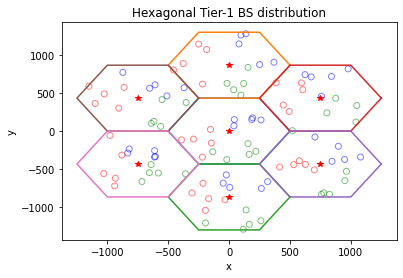

In [107]:
import time
start = time.time()
total_time_steps = 10000
corr_stddev = 8 #dB
sinr_all2, x_mob, y_mob, shadowing, chgaindb, sigpow, interf = handoverSIM2(nums = 1, each_sec = 5, Time_instants = total_time_steps, v_min = 20, v_max = 21, std_dev = corr_stddev)


In [108]:
print("Total time taken: ", (time.time()-start)/60, "mins")

Total time taken:  10.306909481684366 mins


In [109]:
#shad_loss = correlated_shadowing(x_mob, y_mob)

In [110]:
#plt.figure(figsize=(20, 6))
#shuser1 = shad_loss[:1000, 0, 0]
#print(shad_loss.shape)
#print(shuser1.shape)
#plt.plot(shuser1)
#plt.show() 

In [111]:
print(x_mob.shape, y_mob.shape)

(10000, 15) (10000, 15)


## User Trajectory and SINR Change

In [112]:
def plotsrs(srs, xlab = "Time steps (sec)", ylab = None, marker = None, label = None, title=None):
    figure(figsize=(20, 6), dpi=80)
    plt.plot(srs, label=label)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

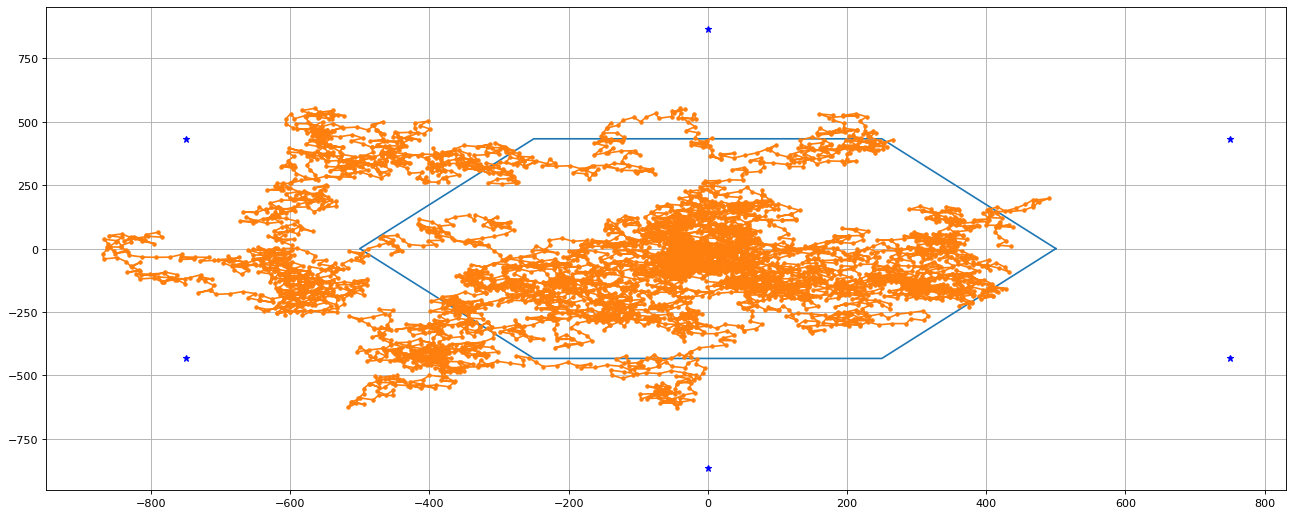

No handles with labels found to put in legend.


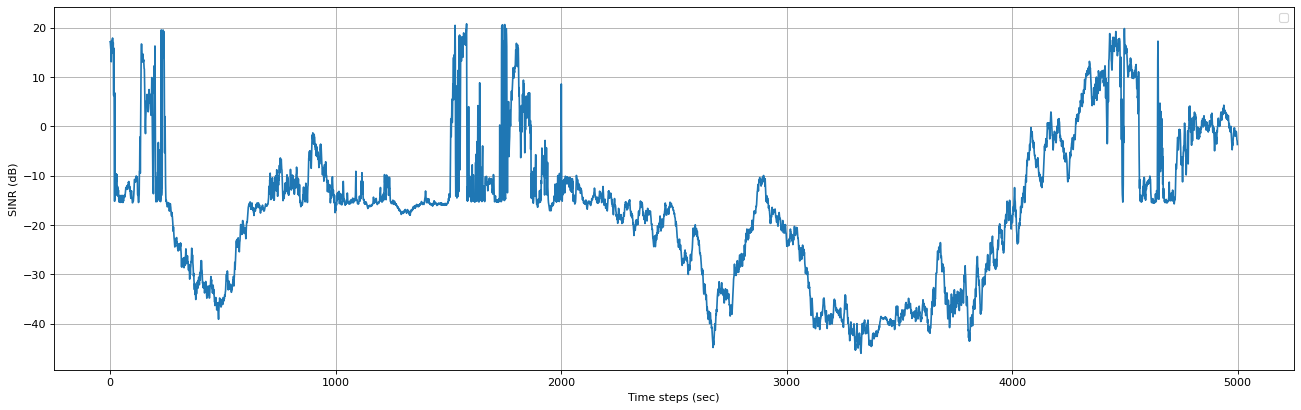

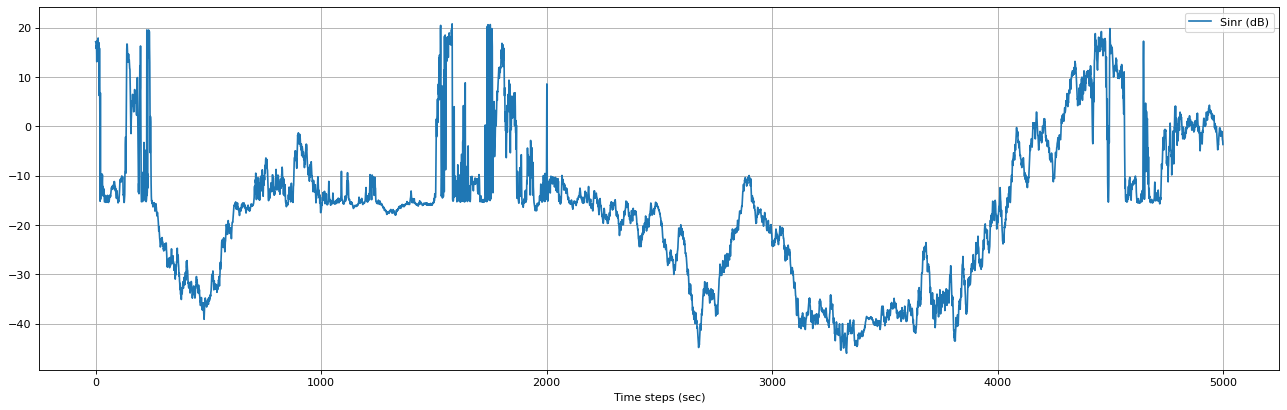

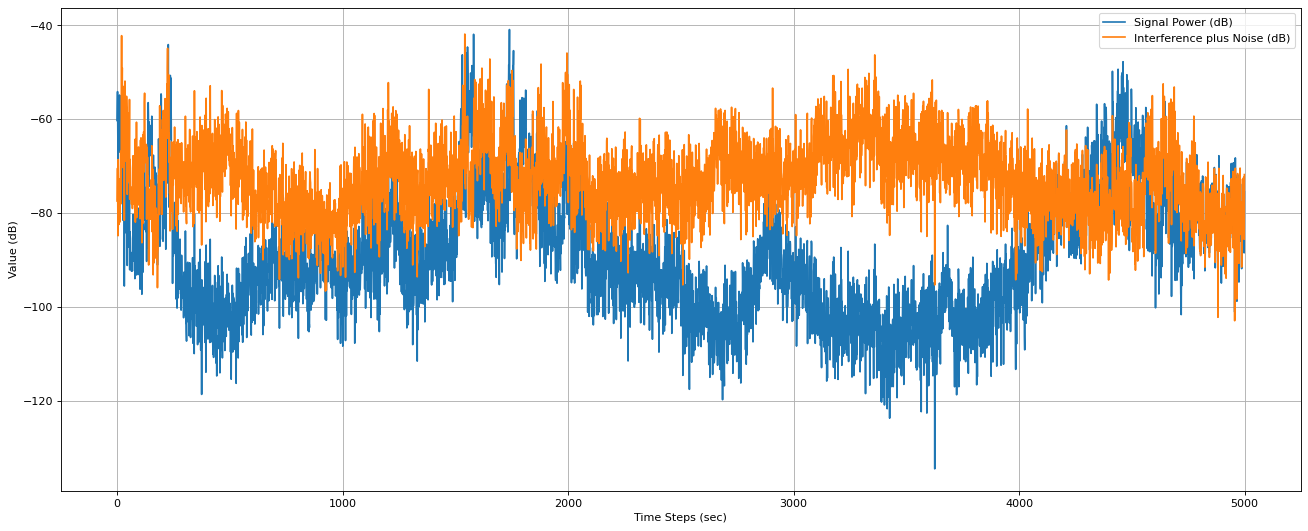

In [113]:
figure(figsize=(20, 8), dpi=80)
numm = 5
#total_user, xs, ys= GetSecusers(numm)
total_user = 105
XX, YY = x_mob, y_mob
#print(np.shape(vel_user))

plt.plot(x1,y1)
plt.plot(BS_locations_x,BS_locations_y,'b*')    

#plt.scatter(BS2x, BS2y)
#plt.scatter(BS3x, BS3y)
#plt.scatter(BS4x, BS4y)
#plt.scatter(BS5x, BS5y)
#plt.scatter(BS6x, BS6y)
#plt.scatter(BS7x, BS7y)

#plt.title('Hexagonal Tier-1 BS distribution with wrap around')
                                                                                
'''for i in range(7):
  k =(3*numm)*i
  plt.scatter(xs[k:k+numm], ys[k:k+numm], edgecolor='b', facecolor='none', alpha=0.5)
  plt.scatter(xs[k+numm:k+2*numm], ys[k+numm:k+2*numm], edgecolor='r', facecolor='none', alpha=0.5)
  plt.scatter(xs[k+2*numm:k+3*numm], ys[k+2*numm:k+3*numm], edgecolor='g', facecolor='none', alpha=0.5)
'''
tsteps,bs, i = 5000, 0, 0
plt.plot(XX[0][i], YY[0][i], '*b')
plt.plot(XX[:tsteps,i], YY[:tsteps,i], '.-')
#plt.xlim([-500,500])
#plt.ylim([100, 300])
plt.grid()
plt.show()

plotsrs(sinr_all2[:tsteps, bs, i], ylab="SINR (dB)")
#plotsrs(chgaindb[:tsteps, bs, i], ylab='chgain (dB)')
plotsrs(10*(np.log10(sigpow[:tsteps, bs, i])-np.log10(interf[:tsteps, bs, i])), label='Sinr (dB)')
#plotsrs(np.log10(sigpow[:tsteps, bs, i]), ylab = "signal power (dB)")
#plotsrs(np.log10(interf[:tsteps, bs, i]), ylab = "Interference (dB)")

figure(figsize=(20, 8), dpi=80)
plt.plot(10*np.log10(sigpow[:tsteps, bs, i]), label = 'Signal Power (dB)')
plt.plot(10*np.log10(interf[:tsteps, bs, i]), label = 'Interference plus Noise (dB)')
plt.legend()
plt.xlabel('Time Steps (sec)')
plt.ylabel('Value (dB)')
plt.grid()
plt.show()

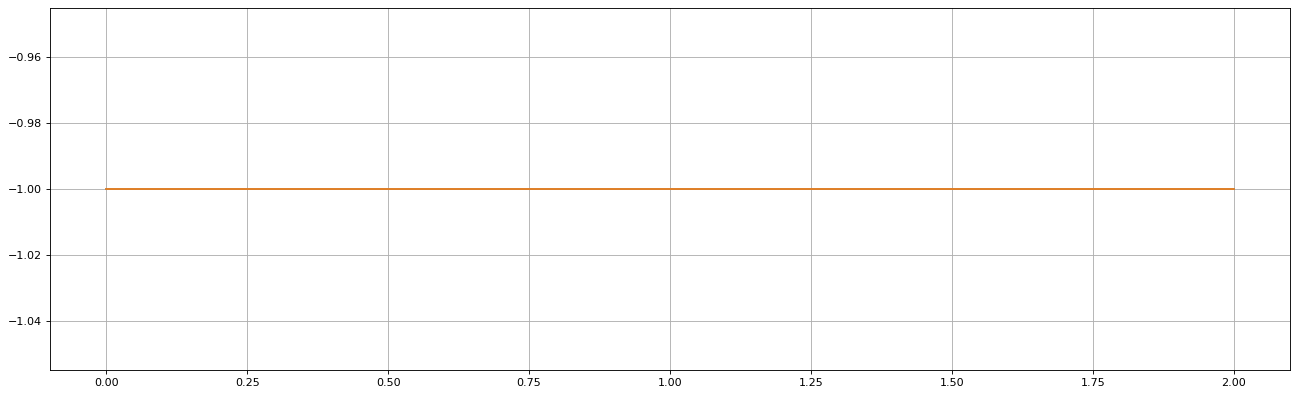

In [79]:
figure(figsize=(20, 6), dpi=80)
plt.plot(test1)
plt.grid()
plt.show()

[5.23755950e-03 4.92803236e-03 2.77377851e+01 1.44765226e+02
 2.64113728e+03 1.87535544e+00 7.15727932e-01 5.97727582e+01
 1.42642752e+03 7.79921541e-03 2.46712476e-03 2.89961905e+01
 4.10068807e+02 2.11220325e+00 1.02099296e+02 3.86476052e+08
 1.79855779e+04 9.14637518e+00 5.81334533e+02 2.29330552e-01
 1.26192566e+02 6.05241451e-01 1.56239623e+01 3.80352369e+03
 1.74140465e-02 3.00157827e-01 2.13197880e+01 3.87589940e+03
 2.89284045e+00 9.67310754e-02 7.92094753e+00 2.86491223e+03
 5.14680965e-01 2.23309662e+00 3.40161933e-01 1.89164554e+00
 1.82453454e+04 1.31035990e+01 2.24595875e+01 6.86200556e+00
 7.65168619e-02 5.60291056e-03 1.74359593e-01 2.02591655e-03
 1.24337759e+01 1.95237015e+01 8.16313986e+01 7.32338524e+02
 1.37632971e+02 2.22459299e-02 3.34434364e+01 6.23842300e+04
 1.93010301e+01 2.47524886e+03 6.90029128e+00 2.93022673e+00
 1.74574748e+01 2.13222118e+01 6.56612308e+00 1.69943757e+02
 1.40060941e-02 6.50837672e+01 1.77899152e+02 5.89411441e+01
 1.75137811e-01 3.335053

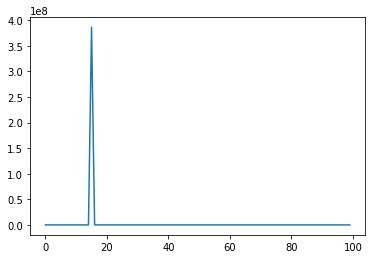

In [80]:
lg = 10*np.random.lognormal(0,4, 100)
print(lg)
plt.plot(lg)

In [81]:
bs, i = 0, 4
print(shadowing[:100, bs, i].shape)
shadowing[:100, bs, i]

(100,)


array([  3.38934939,  -4.91294457,   6.44893988,   0.5990396 ,
        -4.87784154,  -7.39140136,  -6.89182152,  -5.80983568,
        -6.20756245,   2.19710361,  -7.08534317,  -2.89430565,
        -0.9010775 ,  10.32505054,  -9.72721884,  -9.47183826,
        -5.78071968,   1.66851557, -13.48452822,  -5.05809507,
         2.42416286,   2.14396794,  -3.49231945,   5.28086042,
        -5.41168518,  -5.28863342,  -5.1574103 ,  -2.1626922 ,
         0.34769431,  -2.82426394,  -3.59977113,  -0.82754264,
         7.9588603 ,  -1.84646047,  -6.9757585 ,  -8.36580875,
        -1.2552946 , -17.64108012,  -3.40711491,   8.57543442,
        -3.72485056,  -1.03865476,   1.5906991 ,   3.09874237,
        -1.63037064,   0.47980848,  -3.30779493,  -1.68145727,
         2.83687281,  -2.48056049,   4.94323359, -11.22743873,
         6.19585275, -14.801579  ,   0.93975622,  -5.316582  ,
        -1.17264599,   2.92894699,  -1.37050453,  -6.93013137,
         2.23057634,   6.06554383,   2.01756617,  -4.26

In [360]:
from random import randint
from matplotlib import animation, rc
from IPython.display import HTML

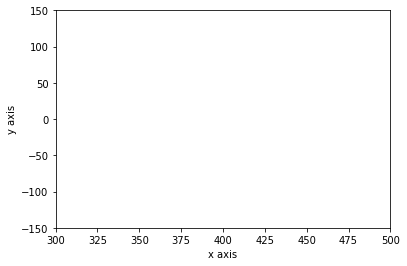

In [259]:
fig = plt.figure()
ax = plt.axes(xlim=(300,500), ylim=(-150, 150), xlabel = 'x axis', ylabel = 'y axis')

#ax.grid()
#line, = ax.plot([], [], '*-', lw=2)

In [ ]:
def init():
    line.set_data([], [], 'x axis')
    return line,

In [ ]:
pt = YY[:20, 4]
pt = np.array(pt)

In [ ]:
# function that draws each frame of the animation
def animate(i):
    ptx = XX[:100, 4]
    pty = YY[:100, 4] 
    xx.append(ptx[i])
    yy.append(pty[i])

    ax.clear()
    ax.plot(xx, yy, label = "user trajectory")
    ax.set_xlabel('x-coordinate (m)')
    ax.set_ylabel('y-coordinate (m)')
    ax.legend()
    ax.grid(True)
    ax.set_xlim([-500,500])
    ax.set_ylim([0, 400])

In [ ]:
# function that draws each frame of the animation
def animate1(i):
    ptx = np.arange(100)
    pty = sinr_all2[:100, 0, 4]
    pty2 = shadowing[:100, 0, 4]
    xx.append(ptx[i])
    yy.append(pty[i])
    y2.append(pty2[i])

    ax.clear()
    ax.plot(x, y, label = "SINR")
    ax.plot(x, y2, label = "Shad_fad")
    ax.set_xlabel('Time steps (sec)')
    ax.set_ylabel('Value (dB)')
    ax.legend()
    ax.grid(True)
    ax.set_xlim([0,100])
    #ax.set_ylim([-30,30])

In [ ]:
# run the animation
xx = []
yy = []
y2 = []
ani = animation.FuncAnimation(fig, animate1, frames=100, interval=300, repeat=False)
HTML(ani.to_html5_video())

In [ ]:
xx = []
yy = []
anim = animation.FuncAnimation(fig, animate, frames=100, interval=300, repeat=False)
HTML(anim.to_html5_video())

In [143]:
print(sinr_all2.shape)

(1000, 21, 105)


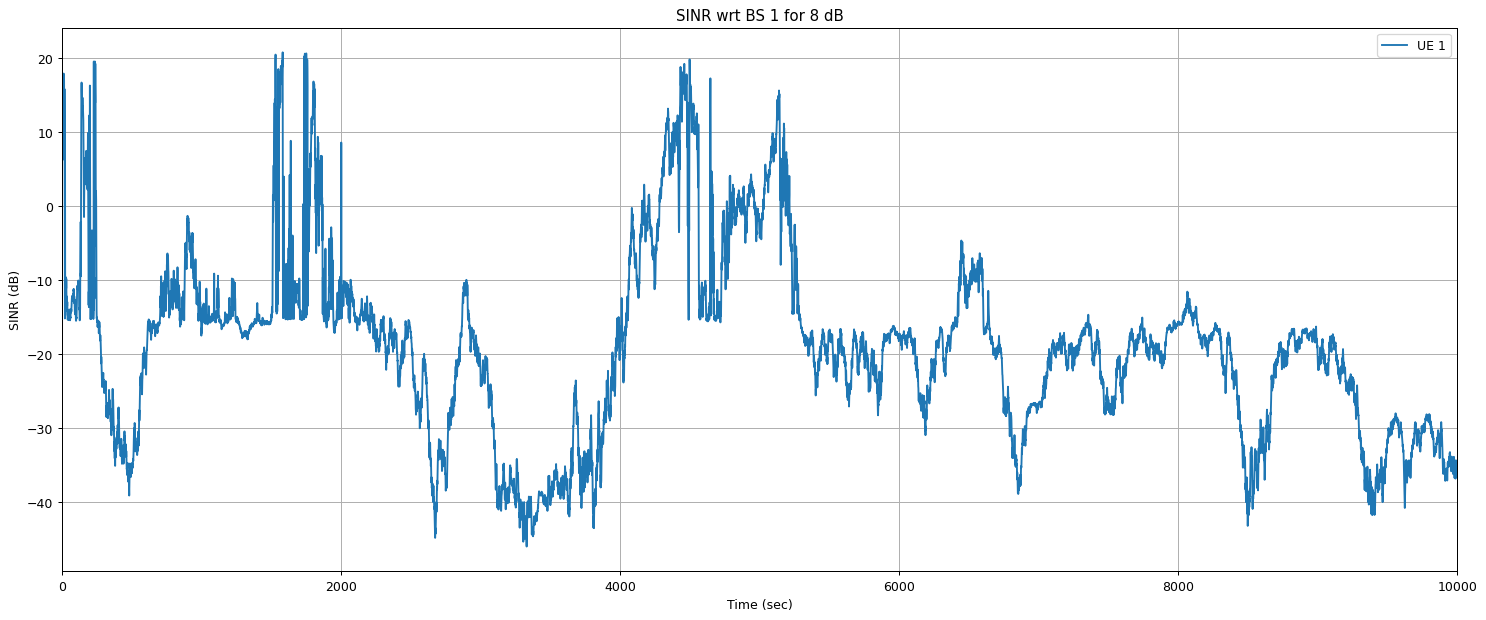

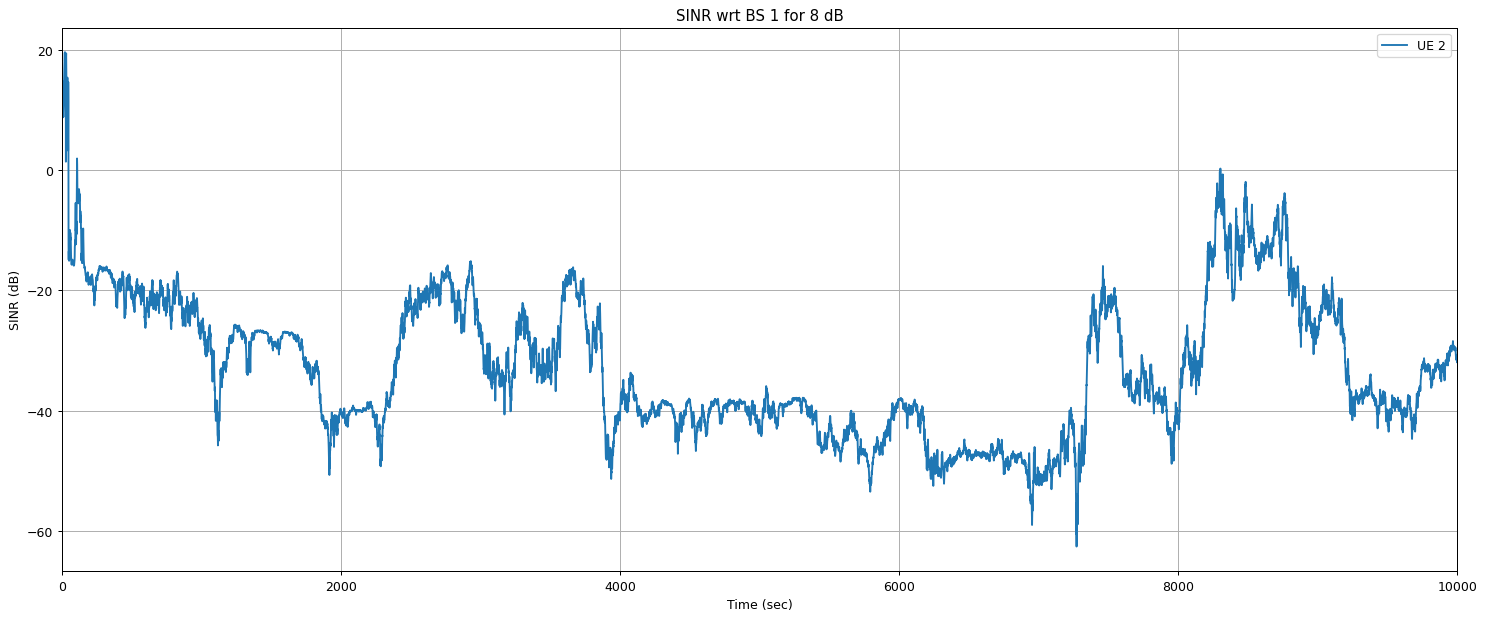

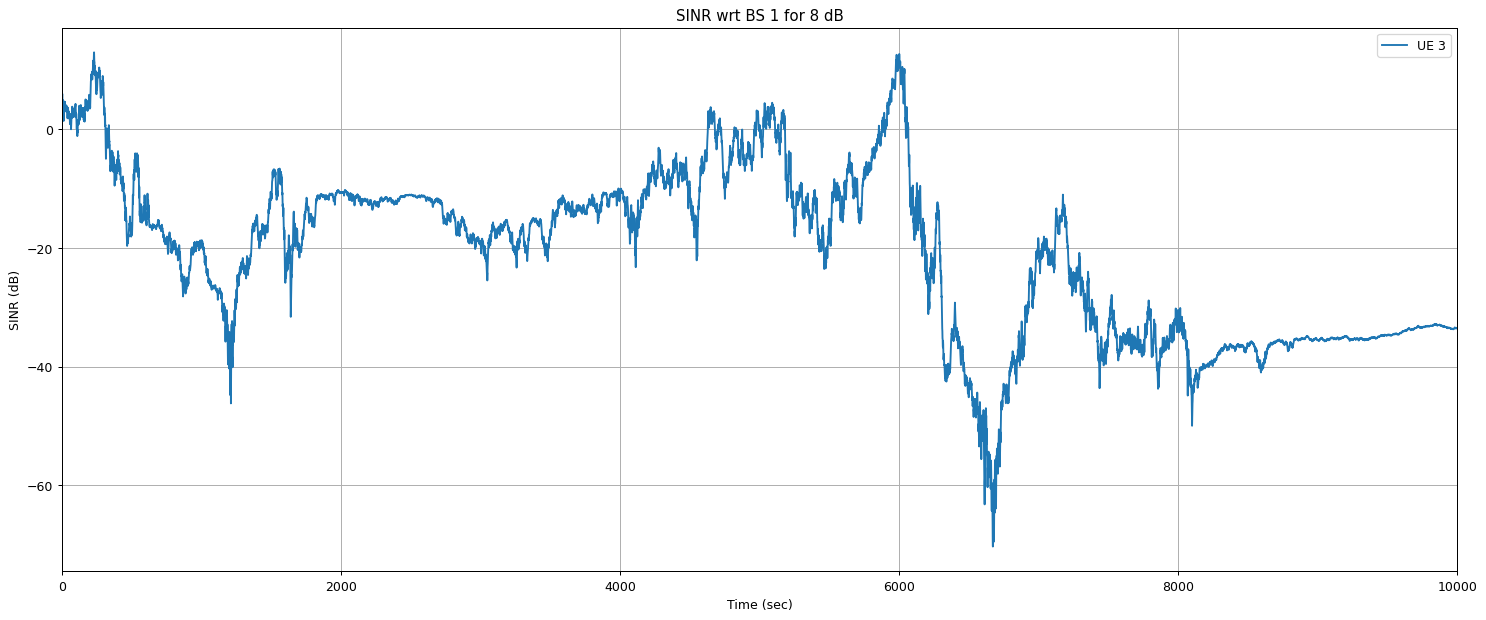

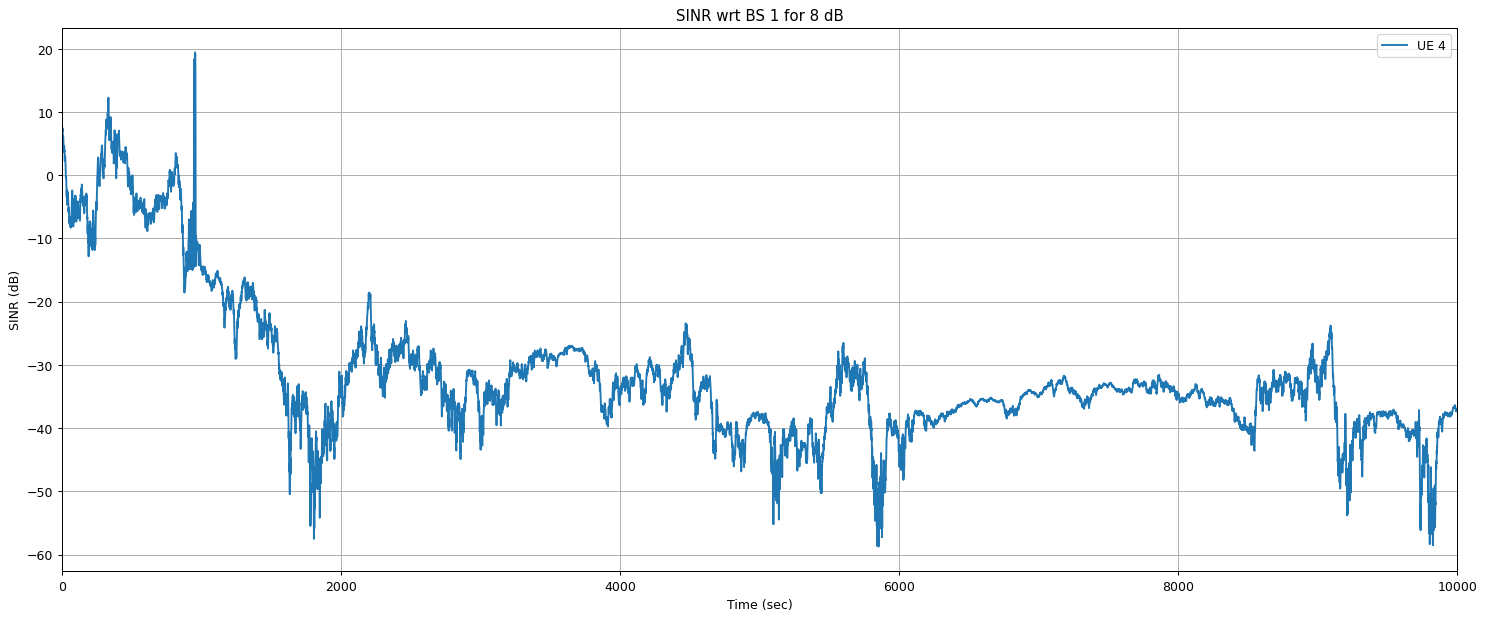

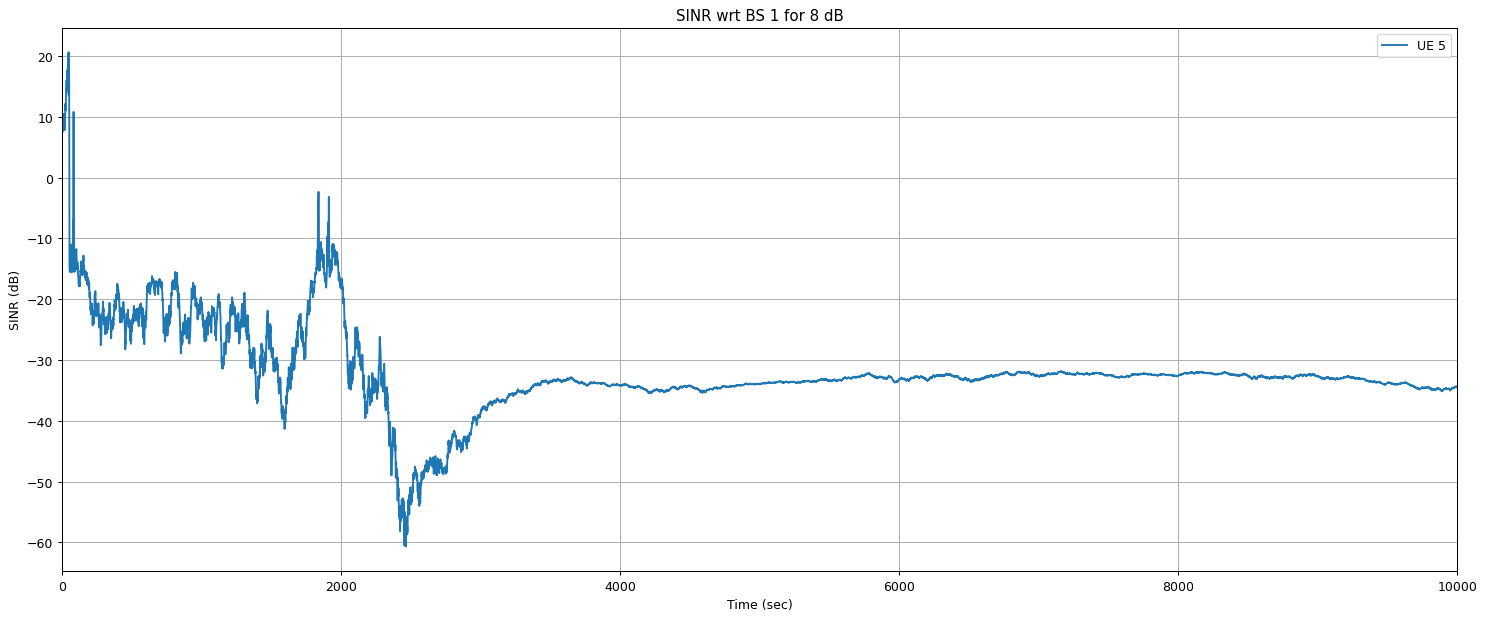

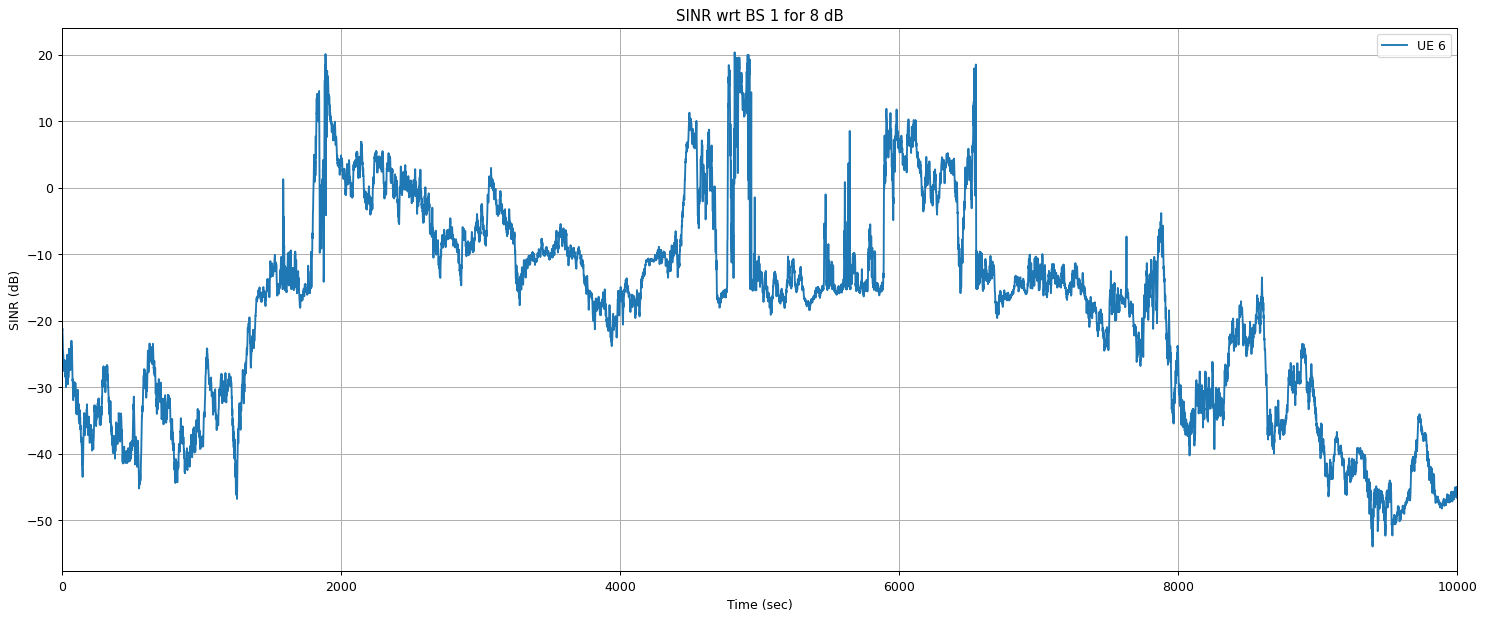

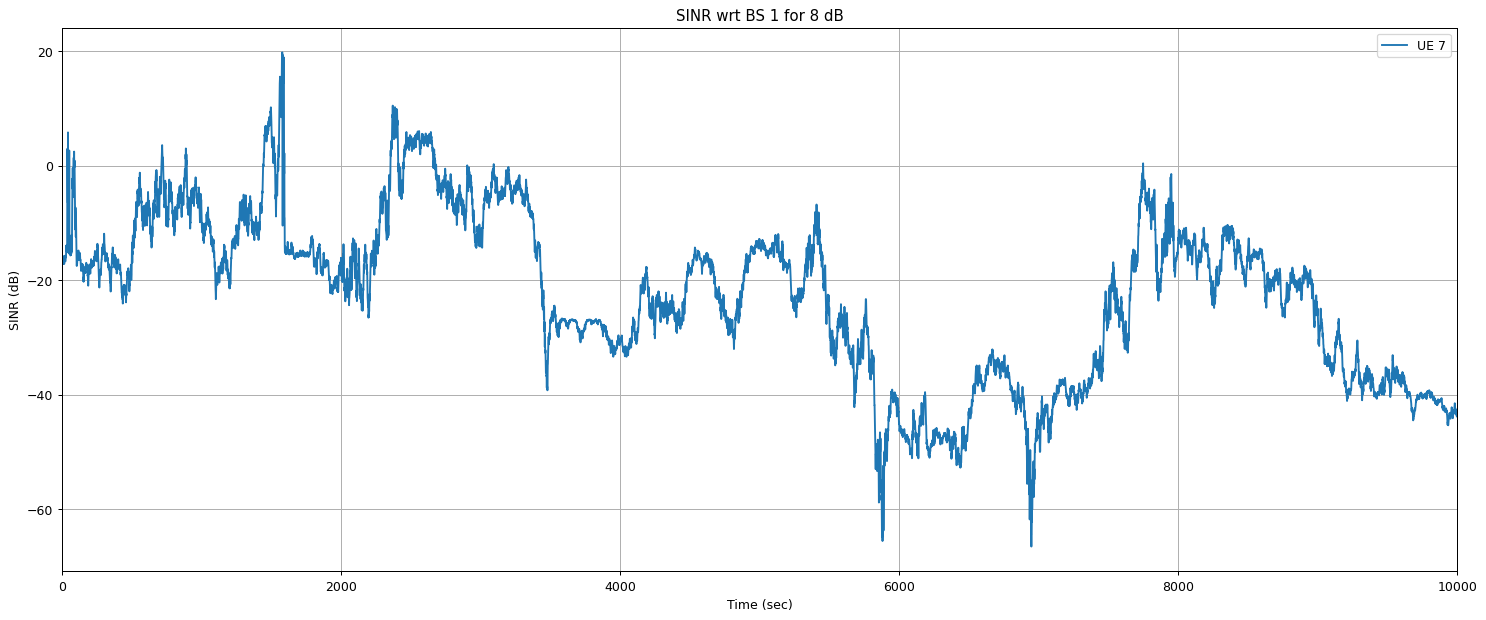

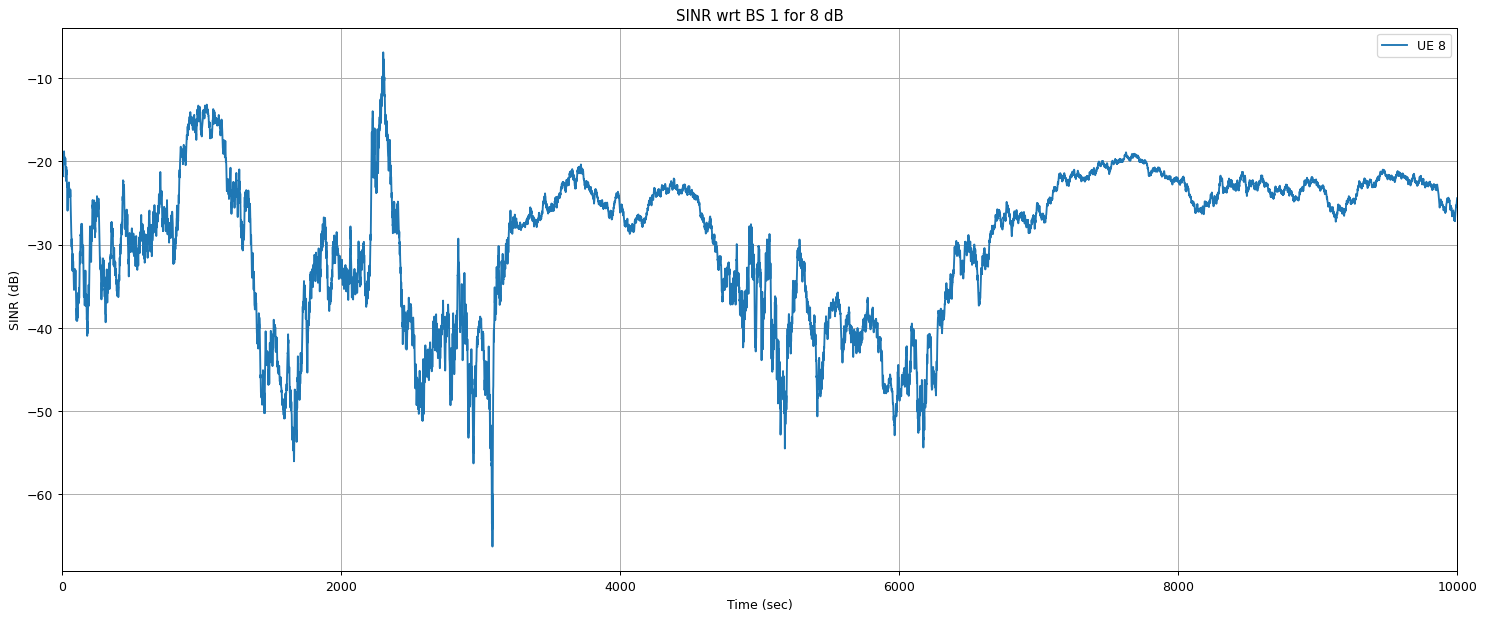

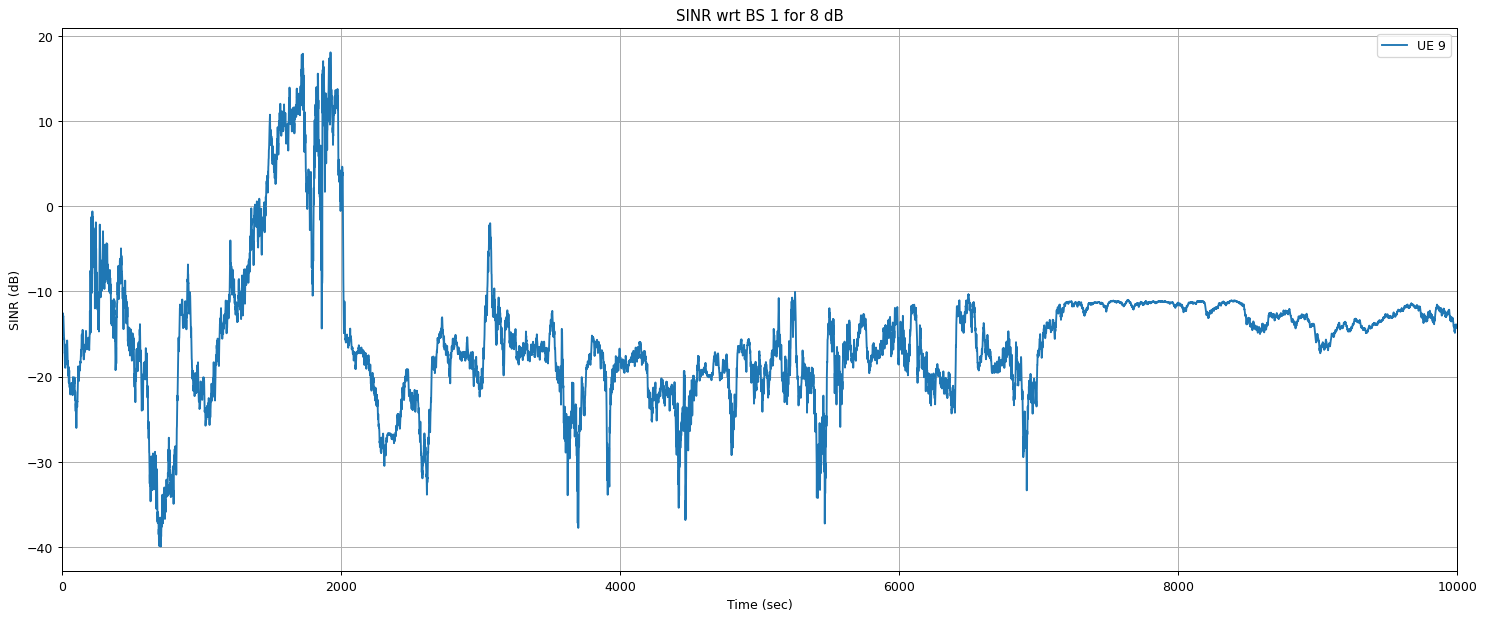

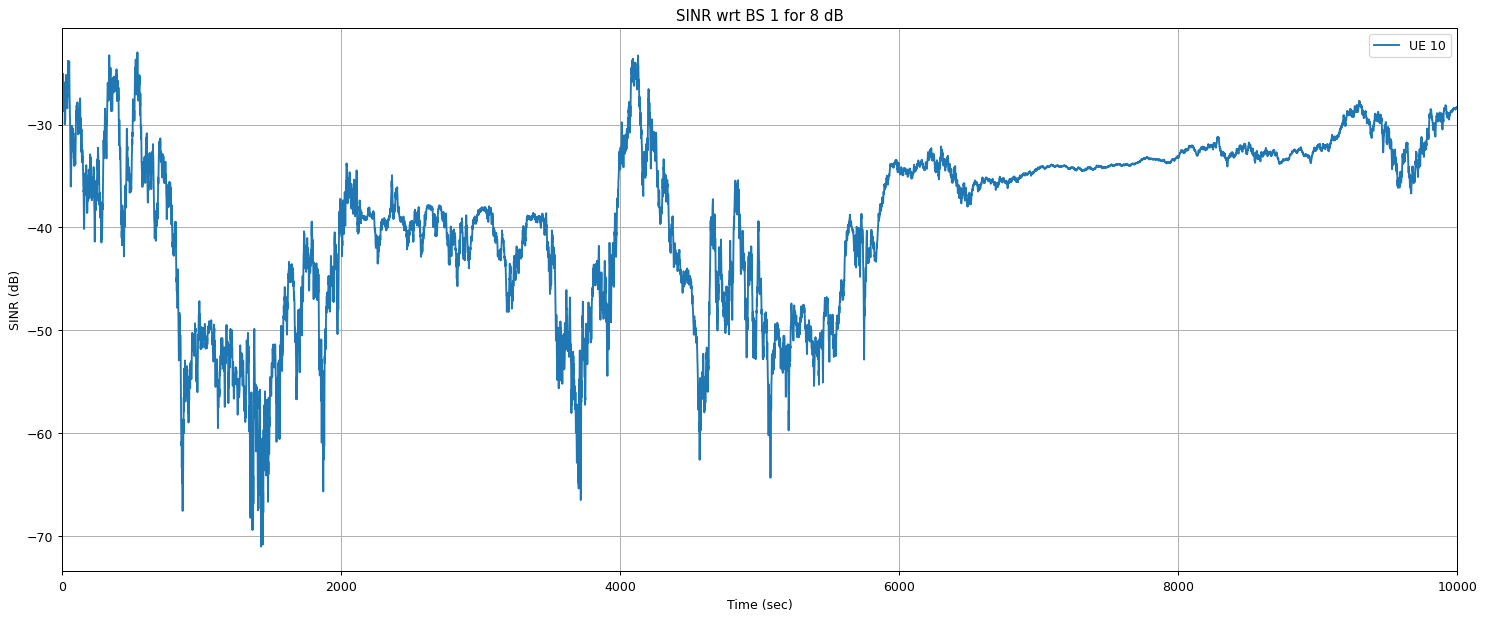

In [114]:
#plotting SINR curve for user 1 for 100 time steps           #with shadowing
from matplotlib.pyplot import figure 
             
temp_steps = total_time_steps
x_cor = np.arange(temp_steps)

for i in range(0,10):
    j = i
    y_cor = sinr_all2[0:temp_steps,0, i]
    figure(figsize=(20, 8), dpi=90) 
    plt.plot(x_cor, y_cor, label='UE {}'.format(j+1))
    plt.title("SINR wrt BS 1 for {} dB".format(corr_stddev))
    plt.xlabel("Time (sec)")
    plt.ylabel("SINR (dB)")
    plt.xlim([0,temp_steps])
    plt.legend()
    plt.grid(True)
    plt.show()

#plt.legend()
#plt.show()

In [362]:
#print(pathloss2)
#np.savetxt('pathloss2.csv', pathloss2[:,:,0], delimiter=',')
#print(chgaindb1)
#np.savetxt('chgain1', chgaindb1[:,:,0], delimiter=',')

In [363]:
#np.shape(sinr_all[0:TIME_INST,0:21, 0])  

In [364]:
#np.savetxt('user.out', sinr_all[0:TIME_INST,0:21, 0], delimiter=',')

In [365]:
#np.savetxt('user_sinr.csv', sinr_all[0:TIME_INST,0:21, 0], delimiter=',')
#np.savetxt('user_velocity.csv', user_mob, delimiter=',')

In [116]:
print(np.shape(sinr_all2[0:total_time_steps,:, 0]))

(10000, 21)


In [117]:
#np.savetxt('sinr_shad_stdev4_16nov.csv', sinr_all2[0:total_time_steps,0:21, 0], delimiter=',')

In [129]:
#np.savetxt('sinr_correl_shad8dB_10k.csv', sinr_all2[0:total_time_steps,:, 0], delimiter=',')

In [128]:
sinr_userx = sinr_all2[0:total_time_steps,:,0] #np.loadtxt('sinr_correl_shad_22dec.csv', delimiter=',')
print(sinr_userx.shape)
timesteps, bstn = sinr_userx.shape

(10000, 21)


# USER SINR VALUES WRT ALL BS

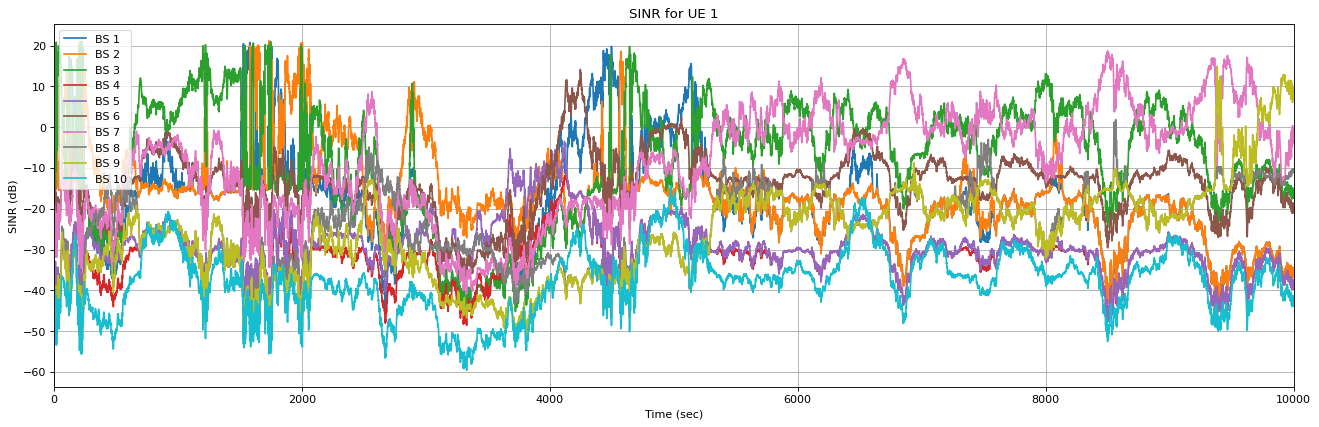

In [127]:
#plotting SINR curve for user 1 for timesteps           #with shadowing, sigma = 4
x_cor = np.arange(timesteps)

figure(figsize=(20, 6), dpi=80) 
for i in range(0,10):
    j = i
    y_cor = sinr_userx[0:timesteps,i]
    #figure(figsize=(20, 6), dpi=80) 
    plt.plot(x_cor, y_cor, label='BS {}'.format(j+1))
    plt.title("SINR for UE 1".format(corr_stddev))
    plt.xlabel("Time (sec)")
    plt.ylabel("SINR (dB)")
    plt.xlim([0, timesteps])
    plt.legend()
    plt.grid(True)
plt.show()

# ML Model Training

## Setup

In [3]:
def plot_series(time, series, std_dev, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time (sec)")
    plt.ylabel("SINR (dB)")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)
    #plt.xlim([0, time.size])
    plt.title("SINR for a UE w.r.t diff BS (std dev = {}dB)".format(std_dev))

In [4]:
def window_dataset(series, window_size, batch_size=32,                          
                   shuffle_buffer=1000):                                         
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))    
    dataset = dataset.shuffle(shuffle_buffer)                                   
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))             
    dataset = dataset.batch(batch_size).prefetch(1)                             
    return dataset

In [5]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

#  Input the SINR series

In [6]:
#series_21 = np.loadtxt('/content/user_2000.csv', delimiter=',')
#series_21 = np.loadtxt('user_sinr_shad_stdev4.csv', delimiter=',')
series_21 = np.loadtxt('sinr_correl_shad6dB_2k.csv', delimiter=',')
#series_21 = sinr_all2[:TIME_INST,0:21, 2]


print(np.shape(series_21))
time = np.arange(len(series_21))
total_time_steps = len(series_21)

print(np.shape(time))

(2000, 21)
(2000,)


In [7]:
#srs  = tf.expand_dims(series_21, axis = -1)
#print(srs.shape)
srs = series_21
#print(srs)
#srs = np.reshape(srs, (-1,1))
print(srs.shape)
print(srs)

(2000, 21)
[[ 15.24986752  -8.21614933 -10.54938105 ... -10.36032204 -29.72226135
  -29.72226135]
 [ 16.37052363 -10.3561154  -11.03869562 ... -11.3069433  -30.58158389
  -30.58158389]
 [ 16.52030613 -11.44373037 -11.44373037 ... -11.53968348 -30.81389736
  -30.81389736]
 ...
 [  8.41105126 -14.71982717 -14.71982717 ... -10.73044446 -30.26335597
  -30.26335597]
 [  8.86176749 -14.71262257 -14.71262257 ... -10.9724262  -30.44075144
  -30.44075144]
 [  8.61073857 -14.83332466 -14.83332466 ... -10.98930221 -30.4578794
  -30.4578794 ]]


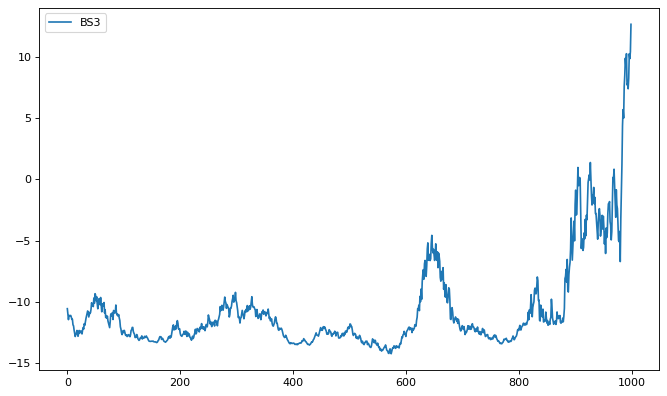

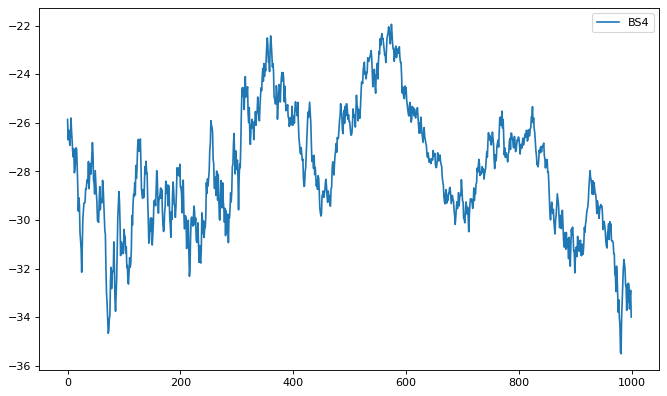

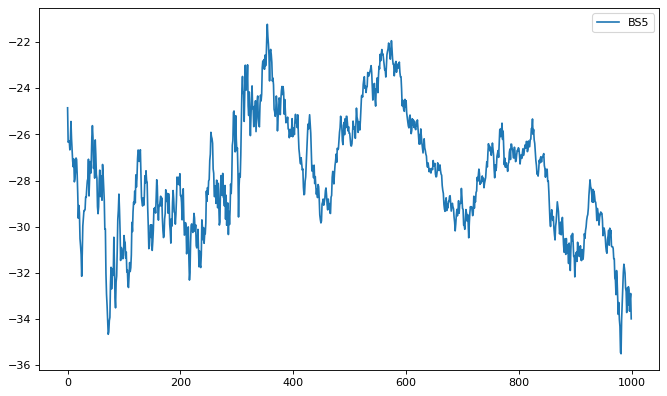

In [8]:
#plotting SINR curve for user 1 for 100 time steps           
from matplotlib.pyplot import figure
                                                  
for i in range(2,5):
  j = i
  y_cor = series_21[:1000,i]
  figure(figsize=(10, 6), dpi=80)  
  plt.plot(time[:1000], y_cor, label='BS{}'.format(j+1))
  plt.legend()
  plt.show()

## Creating Train - Validation Split


In [9]:
series = series_21
series = np.transpose(series)
print(np.shape(series))
series = series.flatten()
print(series.shape)

time = np.arange(len(series))
total_time_steps = len(series)

(21, 2000)
(42000,)


In [72]:
#Creating Train - Validation Split
split_ratio =  0.8
split_time = int (split_ratio*total_time_steps)
time_train = time[:split_time] +1
x_train = series[:split_time]
time_valid = time[split_time:] +1
x_valid = series[split_time:]

In [ ]:
plt.plot(x_train)
#plt.plot(x_valid)
plt.show()

In [ ]:
print("Train time:{}\nValidation Time: {}".format(len(time_train), len(time_valid)))

In [ ]:
print(x_train.shape, '\t', x_valid.shape)

In [ ]:
print("Training data: \n", x_train ,"\n", time_train)
print("\n")
print("Validation data: \n", x_valid ,"\t", time_valid)

## DNN Model

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = window_dataset(x_train, window_size)

model = keras.models.Sequential([
  keras.layers.Dense(10, activation="relu", input_shape=[window_size]),
  keras.layers.Dense(10, activation="relu"),
  keras.layers.Dense(10, activation="relu"),
  keras.layers.Dense(1)
])

lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-7 * 10**(epoch / 20))

#SGD optimizer
optimizer = keras.optimizers.SGD(lr=1e-7, momentum=0.9)

#Huber Loss, mean absolute error as metrics
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=50, callbacks=[lr_schedule])

In [ ]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-7, 5e-2, 0, 30])

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = window_dataset(x_train, window_size)
valid_set = window_dataset(x_valid, window_size)

model = keras.models.Sequential([
  keras.layers.Dense(10, activation="relu", input_shape=[window_size]),
  keras.layers.Dense(10, activation="relu"),
  keras.layers.Dense(10, activation="relu"),
  keras.layers.Dense(1)
])
                                                    

optimizer = keras.optimizers.SGD(learning_rate=1e-4, momentum=0.9)

model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])                      

#Early Stopping
early_stopping = keras.callbacks.EarlyStopping(patience=20)         
                                                            
model.fit(train_set, epochs=150,
          validation_data=valid_set,
          callbacks=[early_stopping])               

In [ ]:
dense_forecast = model_forecast(
    model, 
    series[split_time - window_size:-1], 
    window_size)[:, 0]      

In [ ]:
print(x_valid.shape)
print(dense_forecast.shape)

In [ ]:
plt.figure(figsize=(20, 6))
plot_series(time_valid[:1000], x_valid[:1000], label='Actual')
plot_series(time_valid[:1000], dense_forecast[:1000], label='Predicted')

In [ ]:
print(x_valid)

In [ ]:
#print(keras.metrics.mean_absolute_error(x_valid, dense_forecast).numpy())
print("Mean Absolute Error: ", keras.metrics.mean_absolute_error(x_valid, dense_forecast).numpy())
print("Mean Absolute Percentage Error: {:,.4f}%".format(keras.metrics.mean_absolute_percentage_error(x_valid, dense_forecast).numpy()))

In [ ]:
model.save('saved_models/dnn_with_corrshad6dB_27dec.h5')             

#  **LSTM Model**

In [ ]:
window_size = 5
training_set = window_dataset(x_train, window_size, 5)

print(x_train.shape)

In [ ]:
#keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
#                     input_shape=[None]),

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 20
train_set = window_dataset(x_train, window_size)

model = keras.models.Sequential([
    keras.layers.LSTM(100, return_sequences=True),
    #keras.layers.Dropout(0.2),
    #keras.layers.LSTM(50, return_sequences=True),
    #keras.layers.Dropout(0.1),
    keras.layers.Dense(1)
])

lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-7 * 10**(epoch / 20))

#SGD optimizer
optimizer = keras.optimizers.SGD(lr=1e-7, momentum=0.9)

#MSE Loss, mean absolute percentage error as metrics
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mse"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

In [ ]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.ylabel("Loss")
plt.xlabel("Learning Rate")
plt.axis([1e-8, 1e-1, 0, 50])

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 10
train_set = window_dataset(x_train, window_size)
valid_set = window_dataset(x_valid, window_size)

model = keras.models.Sequential([
    keras.layers.LSTM(50, return_sequences=True),
    #keras.layers.Dropout(0.2),
    #keras.layers.LSTM(50, return_sequences=True),
    #keras.layers.Dropout(0.1),
    keras.layers.Dense(1)
    #keras.layers.Lambda(lambda x: x * 200.0)
])

optimizer = keras.optimizers.SGD(lr=5e-7, momentum=0.9)

model.compile(loss="mean_squared_error",#keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mse"])

early_stopping = keras.callbacks.EarlyStopping(patience=10)
model.fit(train_set, epochs=10,
          validation_data=valid_set,
          callbacks=[early_stopping])

In [ ]:
lstm_forecast = model_forecast(
    model, 
    series[split_time - window_size:-1], 
    window_size)[:,0]      


In [ ]:
print(lstm_forecast.shape)
#lstm_forecast = lstm_forecast.flatten()
print(lstm_forecast.shape)
print(type(lstm_forecast))

In [ ]:
# invert predictions
#trainPredict = scaler.inverse_transform(trainPredict)
#trainY = scaler.inverse_transform([trainY])
#testPredict = scaler.inverse_transform(testPredict)
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
validY = scaler.fit_transform(lstm_forecast)

#validY = scaler.inverse_transform([lstm_forecast])

In [ ]:
plot_series(time_valid, lstm_forecast, label='Predicted')
plot_series(time_valid, validY, label='Predicted')

In [ ]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, label='Actual')
plot_series(time_valid, lstm_forecast, label='Predicted')
plot_series(time_valid, validY, label='Predictedinv')

In [ ]:
keras.metrics.mean_squared_error(x_valid, lstm_forecast).numpy()

# SINR Predictions on DNN Model

In [18]:
from tensorflow.keras.models import load_model

dnn_model = load_model('saved_models/dnn_with_corrshad6dB_27dec.h5')
#dnn_model = load_model('saved_models/dnn')

#dnn_model = load_model('/content/time_series_prediction.h5')

dnn_model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                310       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [33]:
test_dt = np.loadtxt('sinr_correl_shad8dB_2k.csv', delimiter=',')

print(test_dt.shape)

(1000, 21)


In [34]:
print(test_dt[:,1].shape)

txy = test_dt[:,1]
#txy = txy[:,np.newaxis]
print(txy.shape)


time_dt1 = np.arange(len(test_dt[:,1]))
#print(time_dt1, '\t', time_dt1.shape)
#print(time_dt1[window_size:], '\t', time_dt1[window_size:].shape)

(1000,)
(1000,)


In [35]:
#from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
#print(test_dti[window_size:].shape, testdti_forecast.shape)
#print(mean_absolute_error(test_dti[window_size:], testdti_forecast))
#print(mean_squared_error(test_dti[window_size:], testdti_forecast, squared=False))

RMSE :  1.5036787425036977
MAE : 0.7313226631965308


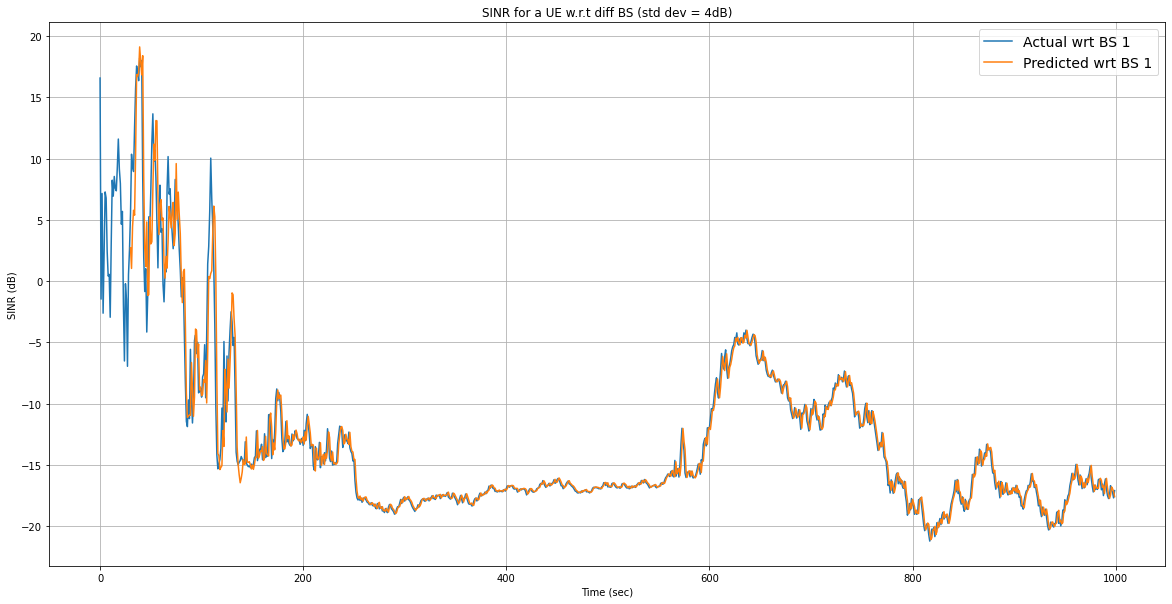

RMSE :  1.623009513646422
MAE : 0.929645105280728


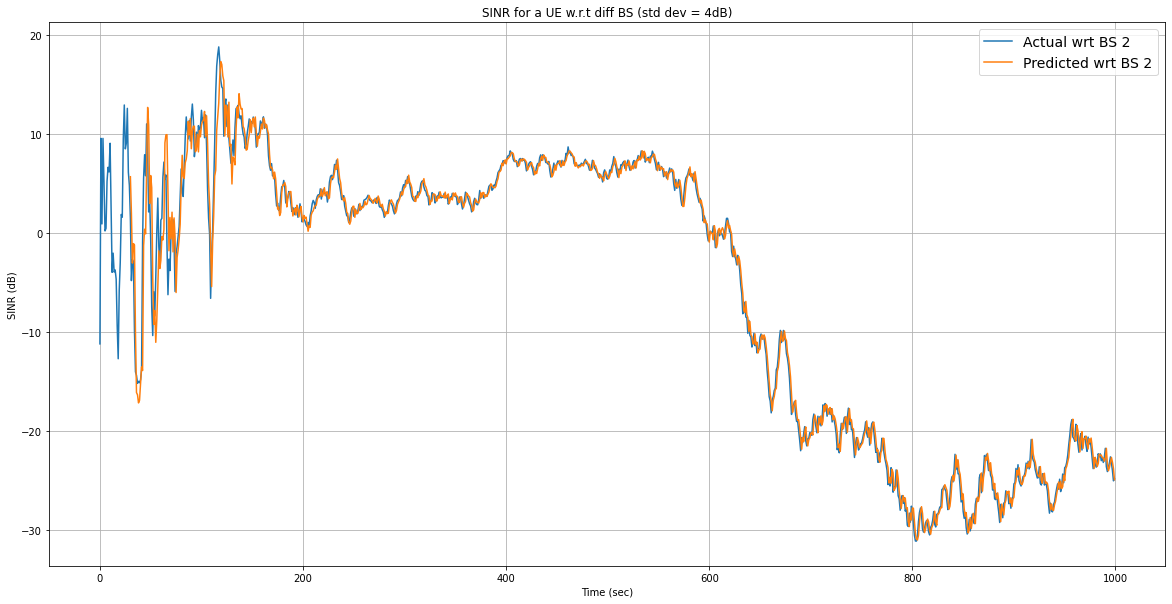

RMSE :  0.5198352895419949
MAE : 0.376757588870522


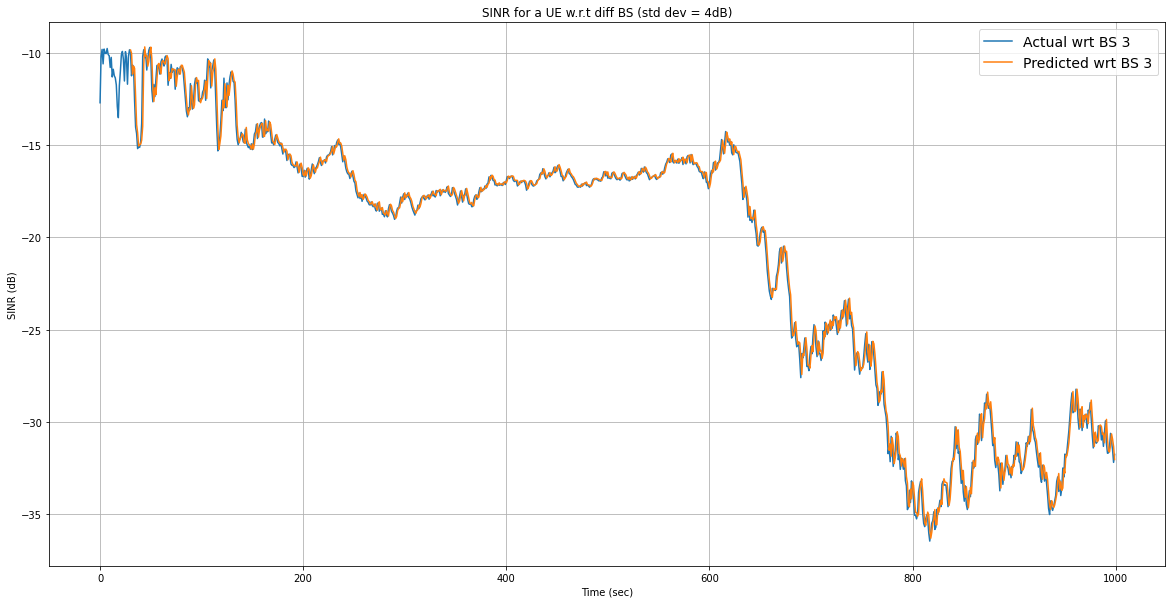

RMSE :  0.584757361796306
MAE : 0.3326736508494522


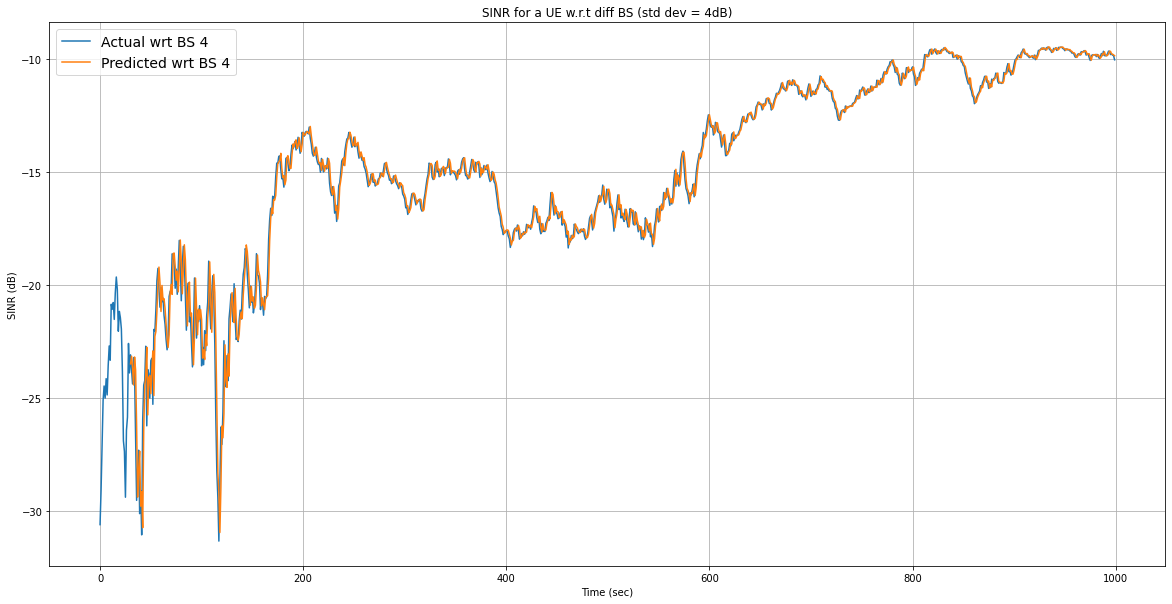

RMSE :  0.8148518442548782
MAE : 0.6055411925984502


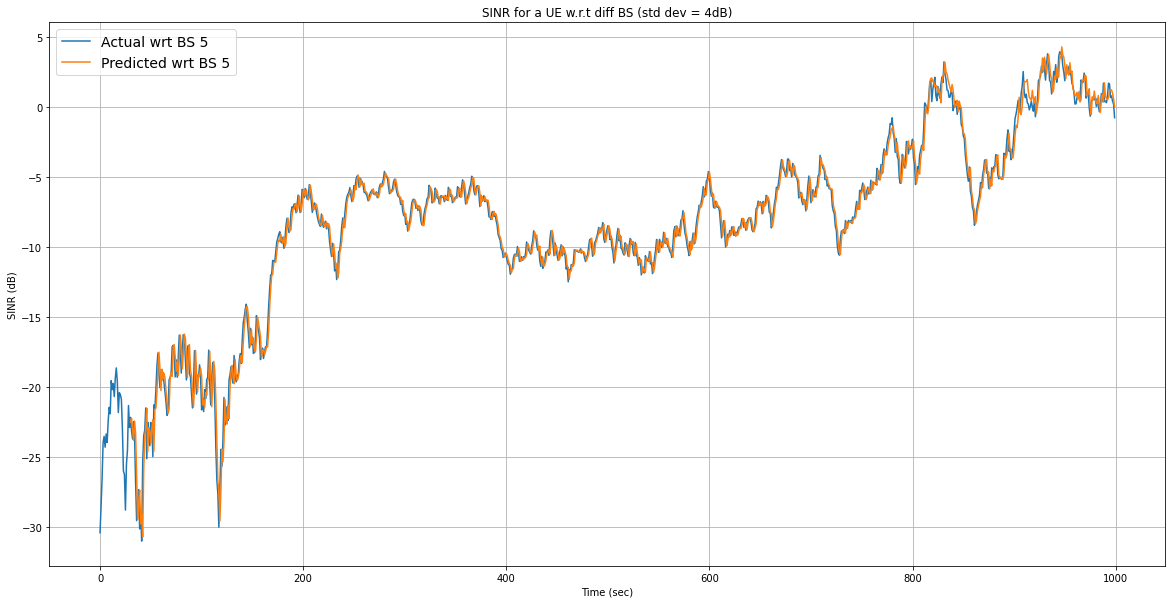

RMSE :  0.7600171666957154
MAE : 0.5208650522280069


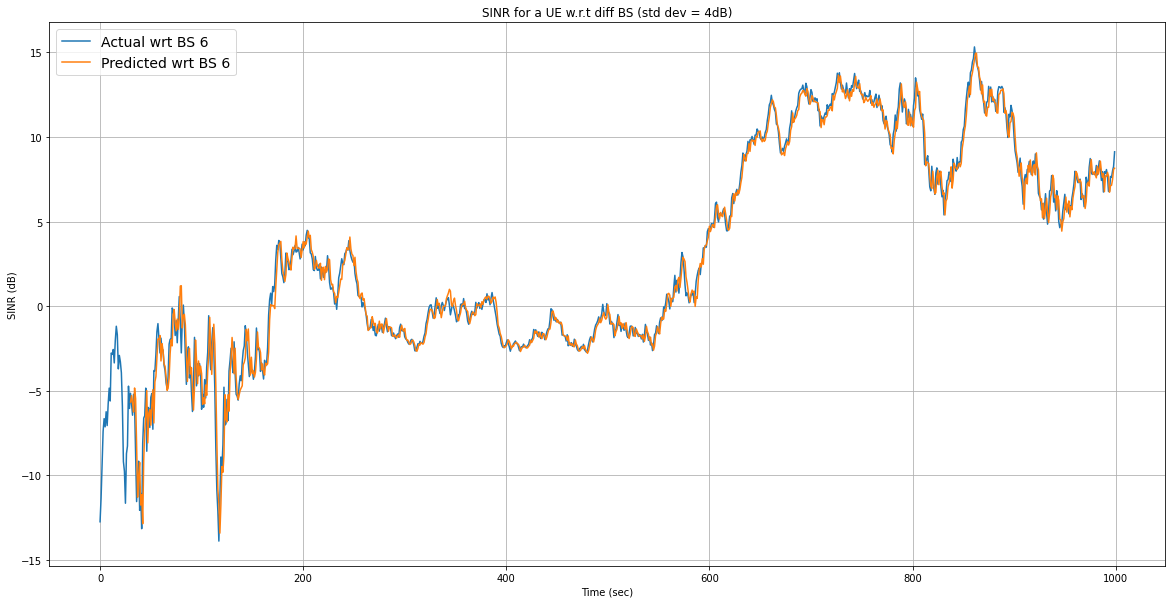

RMSE :  0.5062951861871289
MAE : 0.3090813037725329


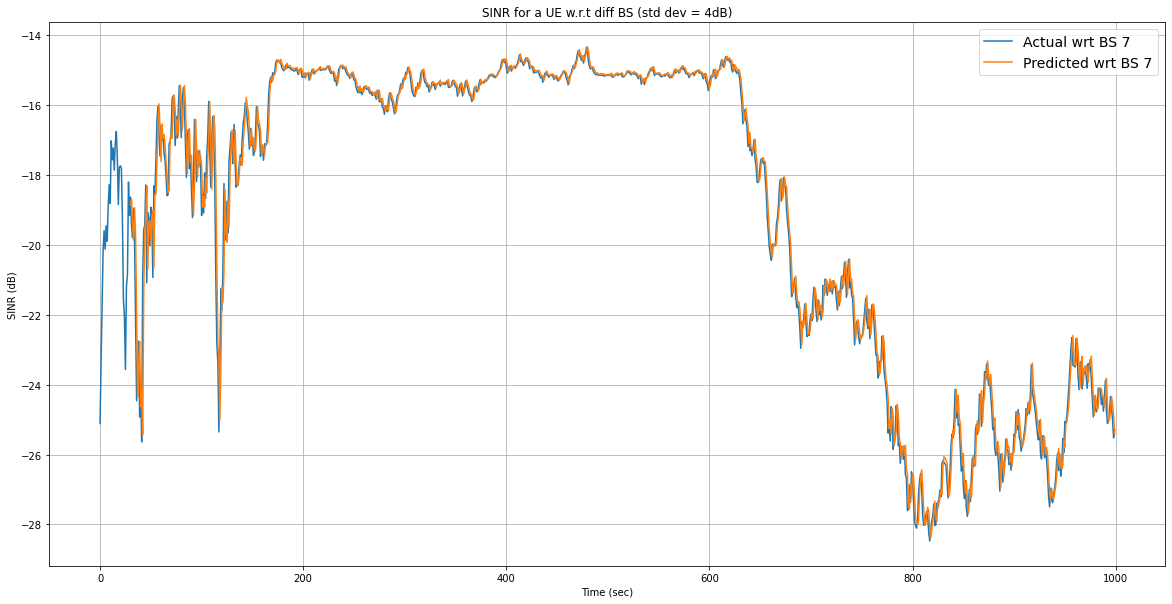

RMSE :  0.6511055407716291
MAE : 0.4671672431400382


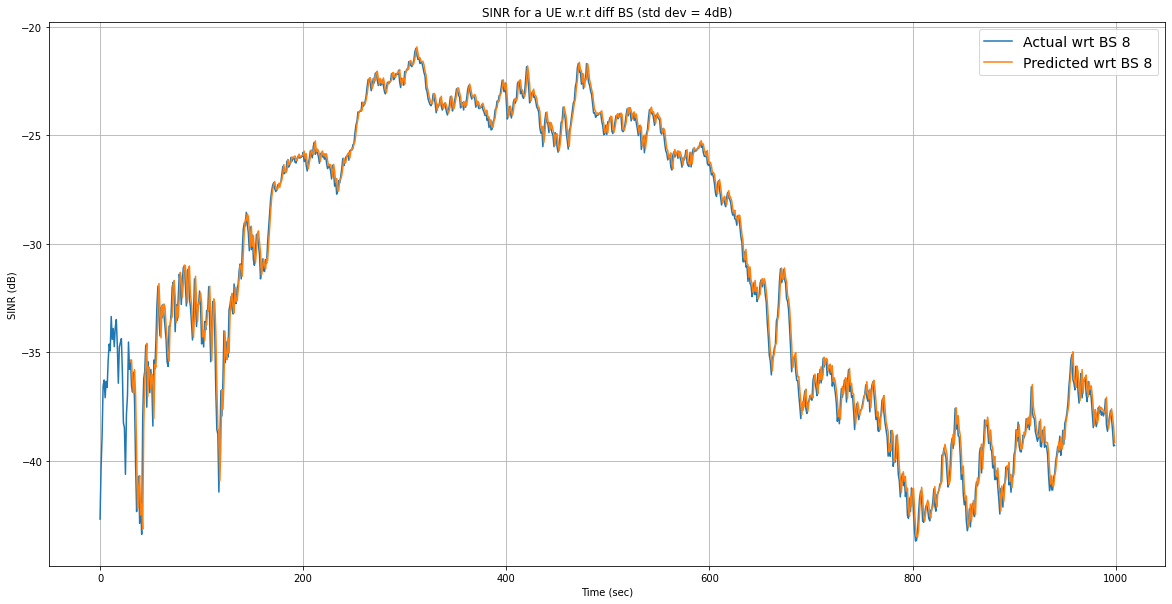

RMSE :  0.545687877483612
MAE : 0.35427847118789696


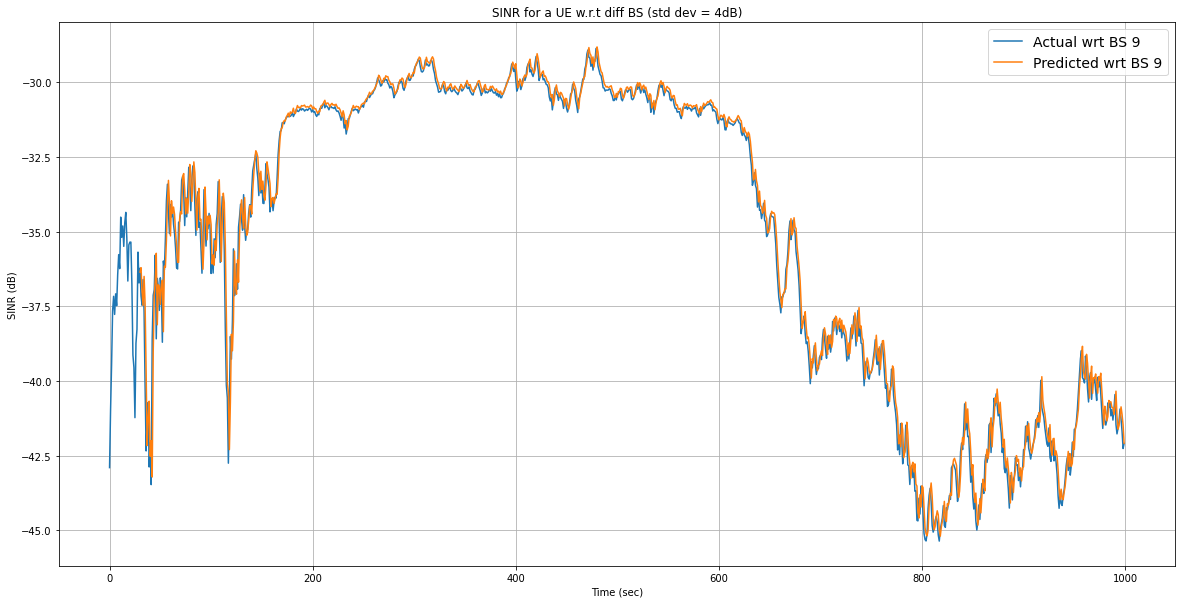

RMSE :  0.5458545988320183
MAE : 0.33882362817896083


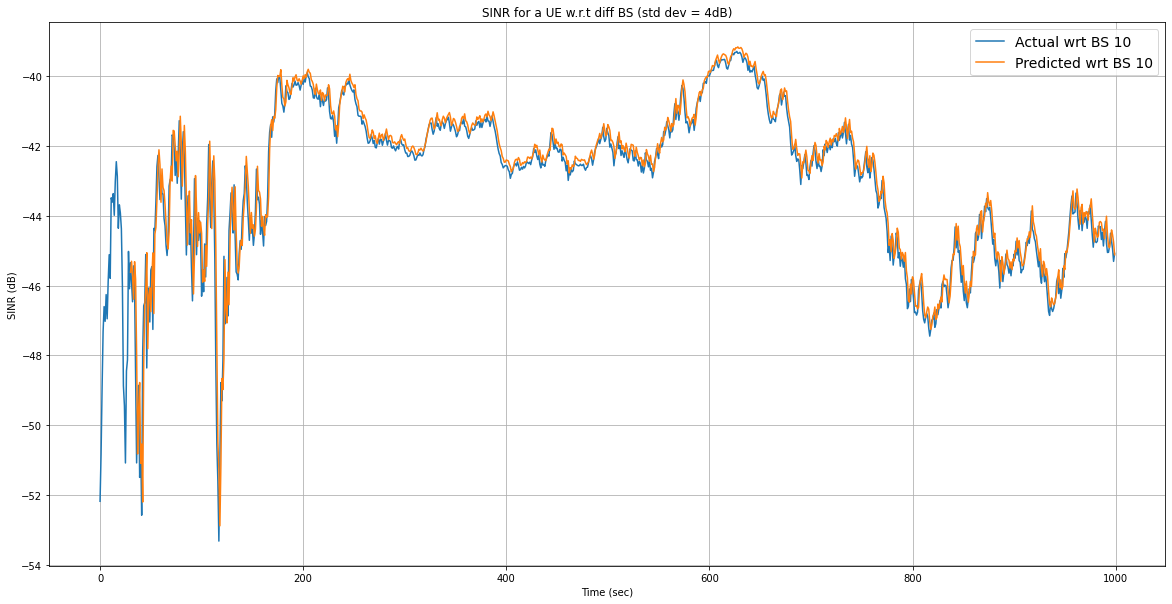

In [36]:
window_size=30
for i in range(0,10):
    test_dti = test_dt[:1000, i] #original
    
    time_dti = np.arange(len(test_dti))
    
    testdti_forecast = model_forecast(dnn_model, test_dti[0:-1], window_size=30)
    testdti_forecast = testdti_forecast[:,0]
    #print(testdti_forecast[:,0].shape)

    #print(time_dti.shape, test_dti[0:-1].shape)
    #print(time_dti[window_size:].shape, pred_yi.shape)
    
    print("RMSE : ", mean_squared_error(test_dti[window_size:], testdti_forecast, squared=False))
    print("MAE :", mean_absolute_error(test_dti[window_size:], testdti_forecast))
    #print(test_dti.shape)
    #print(testdti_forecast.shape)
    
    plt.figure(figsize=(20, 10))
    pred_yi = testdti_forecast  
    plot_series(time_dti, test_dti, std_dev = 4, label="Actual wrt BS {}".format(i+1))
    plot_series(time_dti[window_size:], pred_yi, std_dev = 4, label="Predicted wrt BS {}".format(i+1))
    plt.show()
    

    

In [ ]:
#for x1, x2 in zip(test_dti[30:], testdti_forecast):
#    print(x1, '\t', x2)

# SINR PREDICTIONS ON LSTM MODEL

In [27]:
from tensorflow.keras.models import load_model

#dnn_model = load_model('/content/time_series_prediction_dnn_without_shad.h5')
#LSTM_model = load_model('saved_models/lstm_norm_noshadbsf_16nov.h5')
LSTM_model = load_model('saved_models/lstm_norm_noshadbsf_16nov.h5')

#dnn_model = load_model('/content/time_series_prediction.h5')

LSTM_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (1, None, 100)            40800     
_________________________________________________________________
lstm_15 (LSTM)               (1, None, 100)            80400     
_________________________________________________________________
dense_7 (Dense)              (1, None, 1)              101       
_________________________________________________________________
lambda_7 (Lambda)            (1, None, 1)              0         
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [28]:
sinr_with_shad = np.loadtxt('sinr_correl_shad6dB.csv', delimiter=',')


In [29]:
print(sinr_with_shad.shape)

(3000, 21)


In [30]:
test_sinr_all = sinr_with_shad
print(test_sinr_all.shape)

(3000, 21)


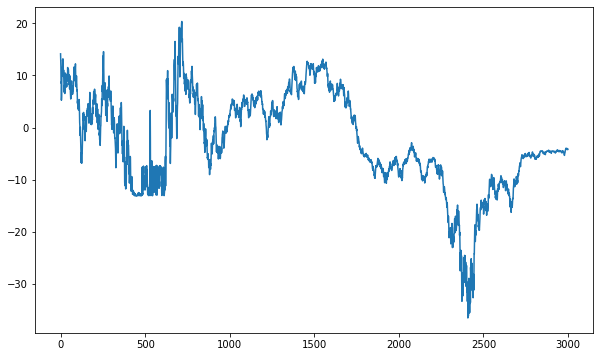

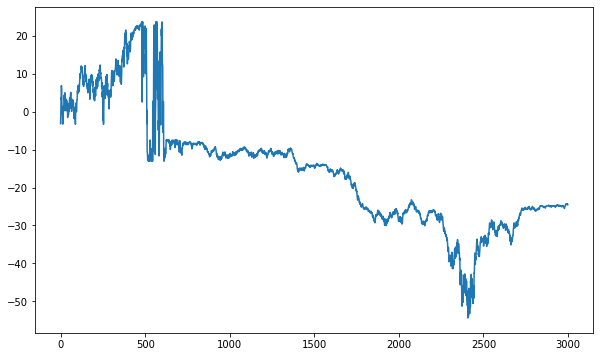

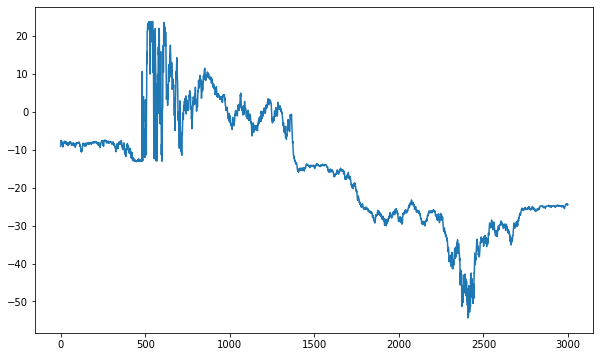

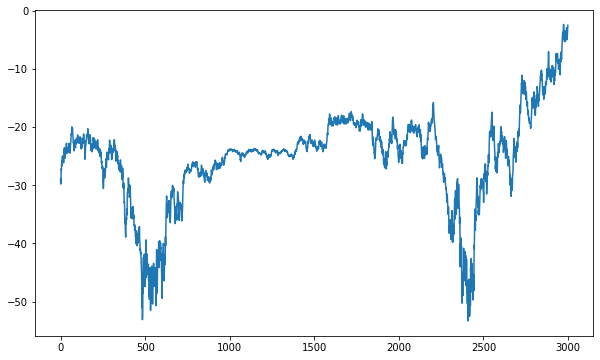

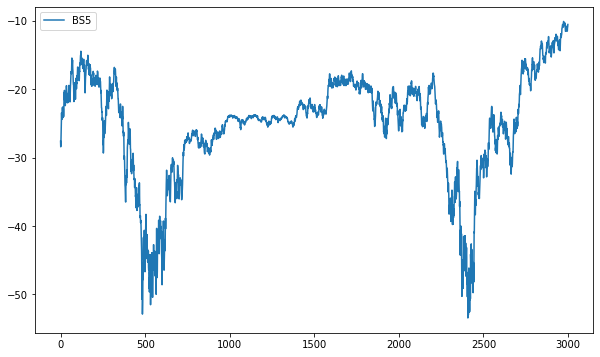

In [31]:
for i in range(5):
  y_cor = test_sinr_all[:,i]
  plt.figure(figsize=(10, 6))
  plt.plot(np.arange(len(y_cor)), y_cor, label='BS{}'.format(i+1))

plt.legend()
plt.show()

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

for i in range(3, 20):
    test_dti = test_sinr_all[:100, i] #original (5000)
    test_dtii = scaler.fit_transform(test_dti[:, np.newaxis]) # normalized (5000,1)
    #print(test_dtii[:,0].shape)
    
    #predictions on normalized set
    testdti_forecast = LSTM_model.predict(test_dtii[np.newaxis, :,:]) #, np.newaxis])
    #print(testdti_forecast.shape)
    testdti_forecast = testdti_forecast[0,:]
    #print(testdti_forecast[:,0].shape)
    
    #getting the original values by inverse transform
    testdt_actuali = scaler.inverse_transform(test_dtii) #(5000,1)
    testpred_actuali = scaler.inverse_transform(testdti_forecast) #(5000,1)
    
    print("MAE :", keras.metrics.mean_absolute_error(testdt_actuali[:,0], testpred_actuali[:,0]).numpy())
    print("MAPE :", keras.metrics.mean_absolute_percentage_error(testdt_actuali[:,0], testpred_actuali[:,0]).numpy())
    
    plt.figure(figsize=(20, 10))
    plot_series(np.arange(len(test_dti)), testdt_actuali, label="Actual wrt BS {}".format(i+1))
    plot_series(np.arange(len(test_dti)), testpred_actuali , label="Predicted wrt BS {}".format(i+1))
    plt.show()

MAE : 0.68304557
MAPE : 2.8315628


TypeError: plot_series() missing 1 required positional argument: 'std_dev'

<Figure size 1440x720 with 0 Axes>